## 1. Setup and Imports

In [1]:
# Import necessary libraries
import sys
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import warnings
from datetime import datetime

# Visualization configuration
plt.style.use('default')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10
warnings.filterwarnings('ignore')

# Add src to path for imports
project_root = Path().cwd().parent
src_path = project_root / 'src'
sys.path.append(str(src_path))

print(f"📁 Project directory: {project_root}")
print(f"🐍 Python version: {sys.version}")
print(f"📊 Pandas version: {pd.__version__}")
print(f"🔢 NumPy version: {np.__version__}")

📁 Project directory: d:\VSCode\nyc_taxi_project
🐍 Python version: 3.11.0 (main, Oct 24 2022, 18:26:48) [MSC v.1933 64 bit (AMD64)]
📊 Pandas version: 2.3.3
🔢 NumPy version: 2.3.5


## 2. Feature Engineer Import

In [2]:
# Import feature engineer and configuration
from data.features import TaxiFeatureEngineer
from config.paths import PROCESSED_DATA, FEATURE_DATA

# Verify file paths
print("📂 PATH CONFIGURATION:")
print(f"   Processed data (input): {PROCESSED_DATA}")
print(f"   Feature data (output): {FEATURE_DATA}")
print(f"   Processed file exists: {Path(PROCESSED_DATA).exists()}")

if not Path(PROCESSED_DATA).exists():
    print("\n⚠️  WARNING: Processed data file not found!")
    print("   Run first the notebook 02_preprocessing_pipeline.ipynb")
    print("   Or execute the preprocess.py script")
else:
    file_size = Path(PROCESSED_DATA).stat().st_size / 1024**2
    print(f"   File size: {file_size:.2f} MB")

# Initialize feature engineer
feature_engineer = TaxiFeatureEngineer()
print(f"\n✅ TaxiFeatureEngineer initialized successfully")

2025-11-30 11:21:24,716 - INFO - TaxiFeatureEngineer initialized


📂 PATH CONFIGURATION:
   Processed data (input): d:\VSCode\nyc_taxi_project\data\processed\processed_data.parquet
   Feature data (output): d:\VSCode\nyc_taxi_project\data\processed\feature_data.parquet
   Processed file exists: True
   File size: 39.69 MB

✅ TaxiFeatureEngineer initialized successfully


## 3. Loading Processed Data

In [3]:
# Load processed/clean data
print("📥 LOADING PROCESSED DATA...")
print("="*50)

data = feature_engineer.load_processed_data()

print(f"\n📊 CLEAN DATASET INFORMATION:")
print(f"   Shape: {data.shape}")
print(f"   Memory usage: {data.memory_usage(deep=True).sum() / 1024**2:.2f} MB")
print(f"   Available columns: {len(data.columns)}")

print(f"\n🔍 AVAILABLE COLUMNS:")
for i, col in enumerate(data.columns, 1):
    print(f"   {i:2d}. {col:<25} ({data[col].dtype})")

print(f"\n🔍 FIRST 3 RECORDS:")
display(data.head(3))

print(f"\n📈 BASIC STATISTICS FOR NUMERIC FIELDS:")
numeric_cols = data.select_dtypes(include=[np.number]).columns
display(data[numeric_cols].describe().round(2))

2025-11-30 11:21:31,494 - INFO - Loading processed data from: d:\VSCode\nyc_taxi_project\data\processed\processed_data.parquet


📥 LOADING PROCESSED DATA...


2025-11-30 11:21:32,347 - INFO - Data loaded: 2,704,171 rows, 20 columns



📊 CLEAN DATASET INFORMATION:
   Shape: (2704171, 20)
   Memory usage: 541.57 MB
   Available columns: 20

🔍 AVAILABLE COLUMNS:
    1. VendorID                  (int64)
    2. tpep_pickup_datetime      (datetime64[us])
    3. tpep_dropoff_datetime     (datetime64[us])
    4. passenger_count           (float64)
    5. trip_distance             (float64)
    6. RatecodeID                (float64)
    7. store_and_fwd_flag        (object)
    8. PULocationID              (int64)
    9. DOLocationID              (int64)
   10. payment_type              (int64)
   11. fare_amount               (float64)
   12. extra                     (float64)
   13. mta_tax                   (float64)
   14. tip_amount                (float64)
   15. tolls_amount              (float64)
   16. improvement_surcharge     (float64)
   17. total_amount              (float64)
   18. congestion_surcharge      (float64)
   19. airport_fee               (float64)
   20. trip_duration_minutes     (float64)

🔍 FIRS

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,trip_duration_minutes
0,1,2022-05-01 00:00:36,2022-05-01 00:19:18,1.0,4.1,1.0,N,246,151,2,17.0,3.0,0.5,0.0,0.0,0.3,23.3,2.5,0.0,18.700000
1,1,2022-05-01 00:27:44,2022-05-01 00:41:33,1.0,2.3,1.0,N,238,74,2,11.0,3.0,0.5,0.0,0.0,0.3,17.3,2.5,0.0,13.816667
2,1,2022-05-01 00:59:00,2022-05-01 01:14:22,1.0,4.2,1.0,N,163,260,2,15.5,3.0,0.5,0.0,0.0,0.3,21.8,2.5,0.0,15.366667



📈 BASIC STATISTICS FOR NUMERIC FIELDS:


,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,trip_duration_minutes
count,2704171.00,2704171.00,2704171.00,2704171.00,2704171.00,2704171.00,2704171.00,2704171.00,2704171.00,2704171.00,2704171.00,2704171.00,2704171.0,2704171.00,2704171.00,2704171.00,2704171.00
mean,1.71,1.42,1.95,1.09,167.69,166.25,1.21,9.88,1.03,0.50,1.95,0.01,0.3,16.09,2.41,0.01,11.77
std,0.45,0.94,1.24,2.88,66.26,68.84,0.42,4.11,1.18,0.01,1.40,0.23,0.0,4.97,0.47,0.12,6.10
min,1.00,1.00,0.01,1.00,1.00,1.00,1.00,0.01,0.00,0.00,0.00,0.00,0.0,1.30,0.00,0.00,1.00
25%,1.00,1.00,1.05,1.00,125.00,114.00,1.00,6.50,0.00,0.50,1.00,0.00,0.3,12.36,2.50,0.00,6.97
50%,2.00,1.00,1.63,1.00,163.00,163.00,1.00,9.00,0.50,0.50,2.00,0.00,0.3,15.36,2.50,0.00,10.78
75%,2.00,1.00,2.50,1.00,236.00,236.00,1.00,12.50,2.50,0.50,2.95,0.00,0.3,19.13,2.50,0.00,15.72
max,2.00,6.00,7.43,99.00,265.00,265.00,4.00,23.20,8.30,3.30,5.90,21.00,0.3,30.83,2.50,1.25,29.42


## 4. Stage 1: Temporal Features

2025-11-30 11:21:51,737 - INFO - Creating temporal features...


🕒 CREATING TEMPORAL FEATURES

📊 Columns before: 20


2025-11-30 11:21:53,345 - INFO - Temporal features created



✅ TEMPORAL FEATURES CREATED:
   New columns: 15
   Total columns: 35

🔍 TEMPORAL FEATURES CREATED (15):
    1. tpep_pickup_datetime      - Examples: {Timestamp('2022-05-11 18:50:10'): np.int64(12), Timestamp('2022-05-16 18:07:58'): np.int64(11), Timestamp('2022-05-26 19:57:33'): np.int64(10)}
    2. tpep_dropoff_datetime     - Examples: {Timestamp('2022-05-10 18:41:22'): np.int64(11), Timestamp('2022-05-20 11:41:12'): np.int64(10), Timestamp('2022-05-11 14:17:46'): np.int64(10)}
    3. trip_duration_minutes     - Examples: {8.866666666666667: np.int64(3377), 8.533333333333333: np.int64(3300), 9.033333333333333: np.int64(3296)}
    4. pickup_hour               - Examples: {18: np.int64(198283), 19: np.int64(183979), 17: np.int64(178956)}
    5. pickup_day_of_week        - Examples: {1: np.int64(455236), 3: np.int64(389520), 0: np.int64(383583)}
    6. pickup_day                - Examples: {12: np.int64(101957), 5: np.int64(100999), 11: np.int64(98584)}
    7. is_weekend                

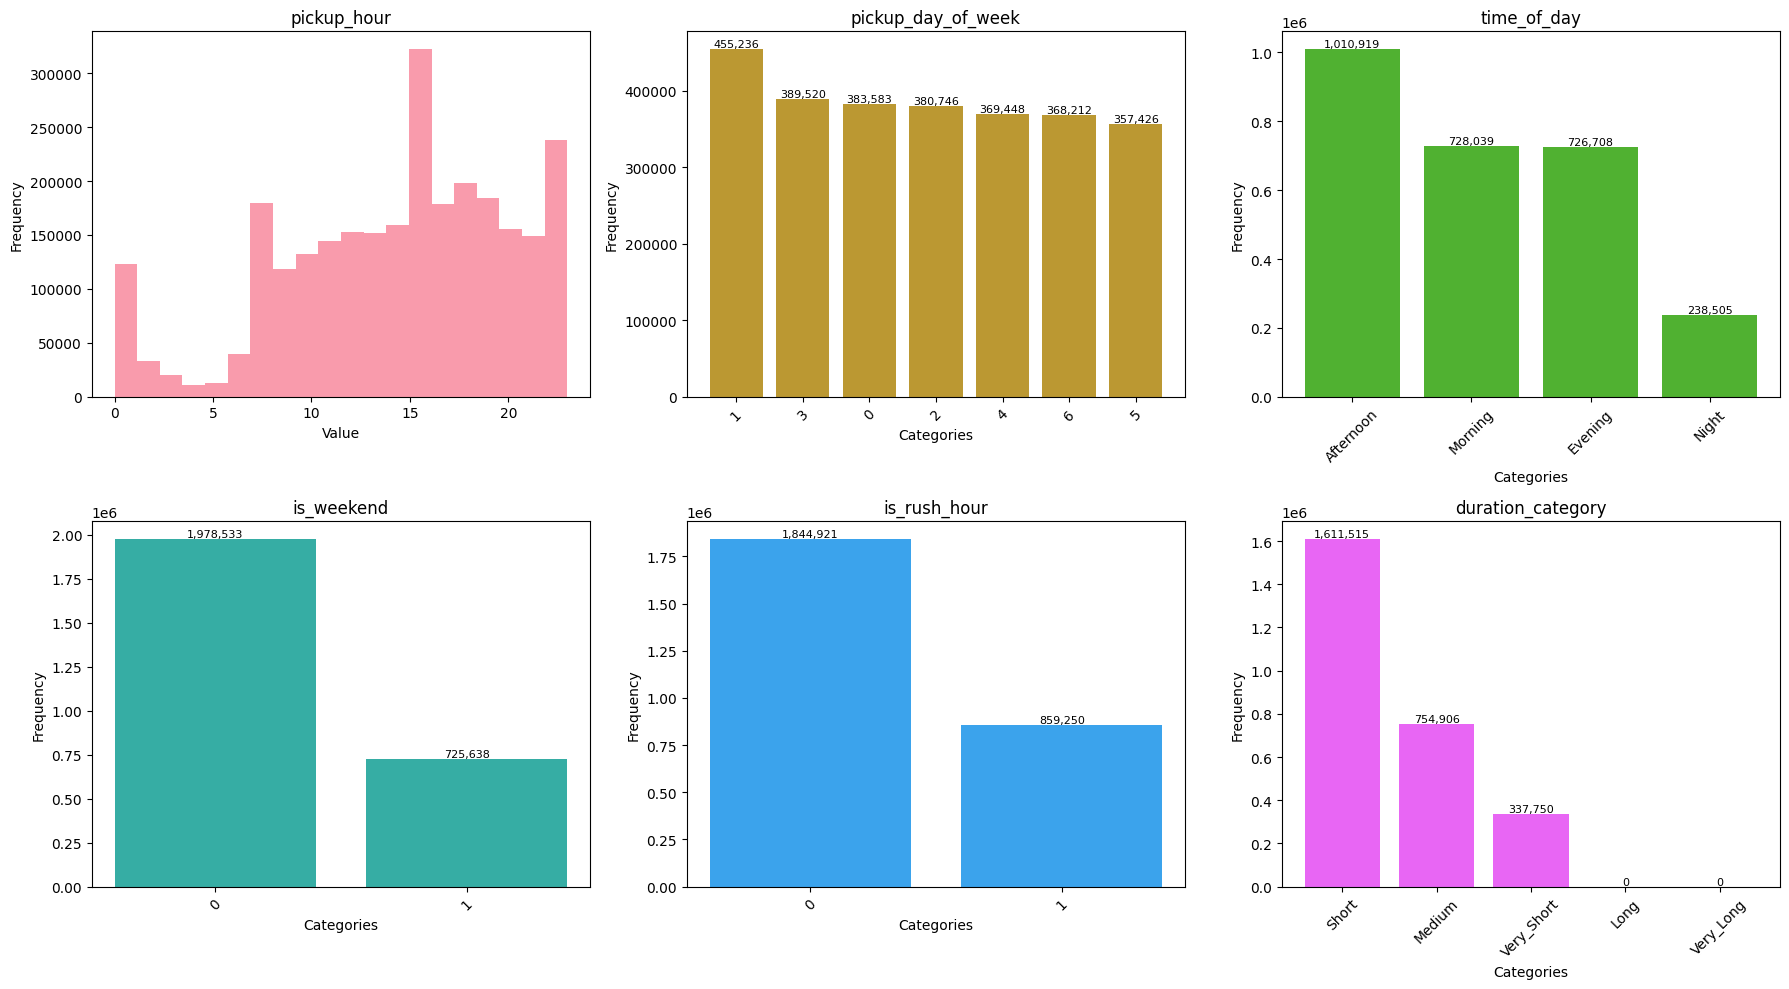


📈 TEMPORAL PATTERNS ANALYSIS:
   Peak hours: {18: np.int64(198283), 19: np.int64(183979), 17: np.int64(178956)}
   Weekly distribution: {'Mon': np.int64(383583), 'Tue': np.int64(455236), 'Wed': np.int64(380746), 'Thu': np.int64(389520), 'Fri': np.int64(369448), 'Sat': np.int64(357426), 'Sun': np.int64(368212)}
   Weekend trips: 26.8%
   Rush hour trips: 31.8%


In [4]:
# Execute temporal features creation
print("🕒 CREATING TEMPORAL FEATURES")
print("="*50)

# Get number of columns before
initial_cols = len(feature_engineer.df.columns)
print(f"\n📊 Columns before: {initial_cols}")

# Create temporal features
temporal_data = feature_engineer.create_temporal_features()

# Statistics after
final_cols = len(feature_engineer.df.columns)
new_cols = final_cols - initial_cols

print(f"\n✅ TEMPORAL FEATURES CREATED:")
print(f"   New columns: {new_cols}")
print(f"   Total columns: {final_cols}")

# Show the new temporal features created
temporal_features = [col for col in feature_engineer.df.columns 
                    if any(keyword in col.lower() for keyword in 
                          ['hour', 'day', 'weekend', 'rush', 'time', 'duration', 'monday', 'friday'])]

print(f"\n🔍 TEMPORAL FEATURES CREATED ({len(temporal_features)}):") 
for i, feature in enumerate(temporal_features, 1):
    sample_values = feature_engineer.df[feature].value_counts().head(3)
    print(f"   {i:2d}. {feature:<25} - Examples: {dict(sample_values)}")

# Temporal features visualization
if len(temporal_features) > 0:
    fig, axes = plt.subplots(2, 3, figsize=(18, 10))
    axes = axes.flatten()
    
    # Select key features for visualization
    key_features = ['pickup_hour', 'pickup_day_of_week', 'time_of_day', 
                   'is_weekend', 'is_rush_hour', 'duration_category']
    
    for i, feature in enumerate(key_features[:6]):
        if feature in feature_engineer.df.columns and i < len(axes):
            if feature_engineer.df[feature].dtype in ['object', 'category'] or len(feature_engineer.df[feature].unique()) <= 10:
                # Bar chart for categorical
                value_counts = feature_engineer.df[feature].value_counts()
                axes[i].bar(range(len(value_counts)), value_counts.values, color=f'C{i}')
                axes[i].set_title(f'{feature}')
                axes[i].set_xlabel('Categories')
                axes[i].set_ylabel('Frequency')
                axes[i].set_xticks(range(len(value_counts)))
                axes[i].set_xticklabels([str(x) for x in value_counts.index], rotation=45)
                
                # Add values above bars
                for j, v in enumerate(value_counts.values):
                    axes[i].text(j, v, f'{v:,}', ha='center', va='bottom', fontsize=8)
            else:
                # Histogram for numeric
                axes[i].hist(feature_engineer.df[feature], bins=20, alpha=0.7, color=f'C{i}')
                axes[i].set_title(f'{feature}')
                axes[i].set_xlabel('Value')
                axes[i].set_ylabel('Frequency')
    
    # Hide unused subplots
    for i in range(len(key_features), len(axes)):
        axes[i].set_visible(False)
    
    plt.tight_layout()
    plt.show()

# Specific temporal patterns analysis
print(f"\n📈 TEMPORAL PATTERNS ANALYSIS:")

if 'pickup_hour' in feature_engineer.df.columns:
    hourly_pattern = feature_engineer.df['pickup_hour'].value_counts().sort_index()
    peak_hours = hourly_pattern.nlargest(3)
    print(f"   Peak hours: {dict(peak_hours)}")

if 'pickup_day_of_week' in feature_engineer.df.columns:
    daily_pattern = feature_engineer.df['pickup_day_of_week'].value_counts().sort_index()
    weekday_names = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
    daily_named = {weekday_names[i]: daily_pattern.get(i, 0) for i in range(7)}
    print(f"   Weekly distribution: {daily_named}")

if 'is_weekend' in feature_engineer.df.columns:
    weekend_pct = feature_engineer.df['is_weekend'].mean() * 100
    print(f"   Weekend trips: {weekend_pct:.1f}%")

if 'is_rush_hour' in feature_engineer.df.columns:
    rush_pct = feature_engineer.df['is_rush_hour'].mean() * 100
    print(f"   Rush hour trips: {rush_pct:.1f}%")

## 5. Stage 2: Distance Features

2025-11-30 11:22:24,306 - INFO - Creating distance features...


📏 CREATING DISTANCE FEATURES

📊 Columns before: 35


2025-11-30 11:22:24,626 - INFO - Distance features created



✅ DISTANCE FEATURES CREATED:
   New columns: 5
   Total columns: 40

🔍 DISTANCE FEATURES CREATED (6):
    1. trip_distance             - Min: 0.01, Max: 7.43, Mean: 1.95
    2. distance_category         - Ejemplos: {'Short': np.int64(1615230), 'Very_Short': np.int64(635339), 'Medium': np.int64(449720)}
    3. is_short_distance         - Min: 0.00, Max: 1.00, Mean: 0.23
    4. is_medium_distance        - Min: 0.00, Max: 1.00, Mean: 0.75
    5. is_long_distance          - Min: 0.00, Max: 0.00, Mean: 0.00
    3. is_short_distance         - Min: 0.00, Max: 1.00, Mean: 0.23
    4. is_medium_distance        - Min: 0.00, Max: 1.00, Mean: 0.75
    5. is_long_distance          - Min: 0.00, Max: 0.00, Mean: 0.00
    6. log_trip_distance         - Min: 0.01, Max: 2.13, Mean: 1.01
    6. log_trip_distance         - Min: 0.01, Max: 2.13, Mean: 1.01


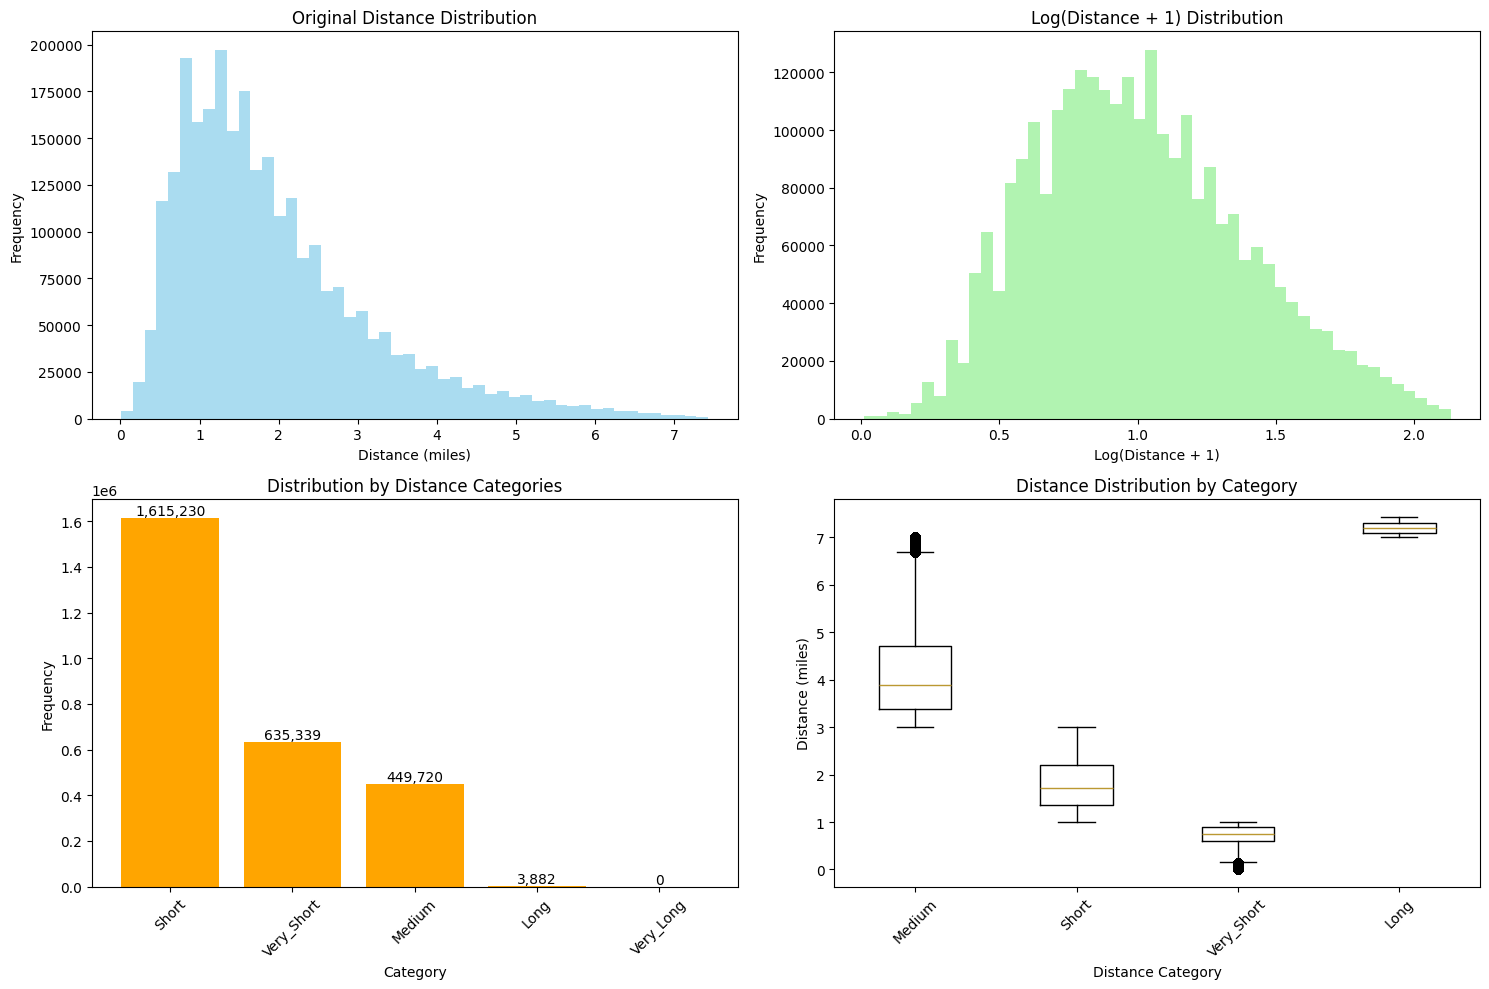


📊 DISTANCE ANALYSIS:
   Average distance: 1.95 miles
   Median distance: 1.63 miles
   Range: 0.01 - 7.43 miles

   Distribution by categories:
      Short: 59.7%
      Very_Short: 23.5%
      Medium: 16.6%
      Long: 0.1%
      Very_Long: 0.0%

   Distance indicators:
      is_short_distance: 23.5%
      is_medium_distance: 75.0%
      is_long_distance: 0.0%
   Average distance: 1.95 miles
   Median distance: 1.63 miles
   Range: 0.01 - 7.43 miles

   Distribution by categories:
      Short: 59.7%
      Very_Short: 23.5%
      Medium: 16.6%
      Long: 0.1%
      Very_Long: 0.0%

   Distance indicators:
      is_short_distance: 23.5%
      is_medium_distance: 75.0%
      is_long_distance: 0.0%


In [5]:
# Execute distance features creation
print("📏 CREATING DISTANCE FEATURES")
print("="*50)

# Get number of columns before
initial_cols = len(feature_engineer.df.columns)
print(f"\n📊 Columns before: {initial_cols}")

# Create distance features
distance_data = feature_engineer.create_distance_features()

# Statistics after
final_cols = len(feature_engineer.df.columns)
new_cols = final_cols - initial_cols

print(f"\n✅ DISTANCE FEATURES CREATED:")
print(f"   New columns: {new_cols}")
print(f"   Total columns: {final_cols}")

# Show the new distance features created
distance_features = [col for col in feature_engineer.df.columns 
                    if any(keyword in col.lower() for keyword in 
                          ['distance', 'log_trip'])]

print(f"\n🔍 DISTANCE FEATURES CREATED ({len(distance_features)}):") 
for i, feature in enumerate(distance_features, 1):
    if feature_engineer.df[feature].dtype in ['object', 'category']:
        sample_values = feature_engineer.df[feature].value_counts().head(3)
        print(f"   {i:2d}. {feature:<25} - Ejemplos: {dict(sample_values)}")
    else:
        stats = feature_engineer.df[feature].describe()
        print(f"   {i:2d}. {feature:<25} - Min: {stats['min']:.2f}, Max: {stats['max']:.2f}, Mean: {stats['mean']:.2f}")

#  Distance features visualization
if 'trip_distance' in feature_engineer.df.columns:
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    
    # Original distance distribution
    axes[0,0].hist(feature_engineer.df['trip_distance'], bins=50, alpha=0.7, color='skyblue')
    axes[0,0].set_title('Original Distance Distribution')
    axes[0,0].set_xlabel('Distance (miles)')
    axes[0,0].set_ylabel('Frequency')
    
    # Logarithmic distribution if exists
    if 'log_trip_distance' in feature_engineer.df.columns:
        axes[0,1].hist(feature_engineer.df['log_trip_distance'], bins=50, alpha=0.7, color='lightgreen')
        axes[0,1].set_title('Log(Distance + 1) Distribution')
        axes[0,1].set_xlabel('Log(Distance + 1)')
        axes[0,1].set_ylabel('Frequency')
    
    # Distance categories if exists
    if 'distance_category' in feature_engineer.df.columns:
        dist_counts = feature_engineer.df['distance_category'].value_counts()
        axes[1,0].bar(range(len(dist_counts)), dist_counts.values, color='orange')
        axes[1,0].set_title('Distribution by Distance Categories')
        axes[1,0].set_xlabel('Category')
        axes[1,0].set_ylabel('Frequency')
        axes[1,0].set_xticks(range(len(dist_counts)))
        axes[1,0].set_xticklabels(dist_counts.index, rotation=45)
        
        # Add values above bars
        for i, v in enumerate(dist_counts.values):
            axes[1,0].text(i, v, f'{v:,}', ha='center', va='bottom')
    
    # Distance boxplot by category
    if 'distance_category' in feature_engineer.df.columns:
        categories = feature_engineer.df['distance_category'].unique()
        data_by_category = [feature_engineer.df[feature_engineer.df['distance_category'] == cat]['trip_distance'].values 
                           for cat in categories if not pd.isna(cat)]
        
        if data_by_category:
            axes[1,1].boxplot(data_by_category, labels=[str(cat) for cat in categories if not pd.isna(cat)])
            axes[1,1].set_title('Distance Distribution by Category')
            axes[1,1].set_xlabel('Distance Category')
            axes[1,1].set_ylabel('Distance (miles)')
            axes[1,1].tick_params(axis='x', rotation=45)
    
    plt.tight_layout()
    plt.show()

# Distance features analysis
print(f"\n📊 DISTANCE ANALYSIS:")

if 'trip_distance' in feature_engineer.df.columns:
    dist_stats = feature_engineer.df['trip_distance'].describe()
    print(f"   Average distance: {dist_stats['mean']:.2f} miles")
    print(f"   Median distance: {dist_stats['50%']:.2f} miles")
    print(f"   Range: {dist_stats['min']:.2f} - {dist_stats['max']:.2f} miles")

if 'distance_category' in feature_engineer.df.columns:
    dist_distribution = feature_engineer.df['distance_category'].value_counts(normalize=True) * 100
    print(f"\n   Distribution by categories:")
    for cat, pct in dist_distribution.items():
        print(f"      {cat}: {pct:.1f}%")

# Binary distance indicators
binary_distance_features = ['is_short_distance', 'is_medium_distance', 'is_long_distance']
existing_binary = [col for col in binary_distance_features if col in feature_engineer.df.columns]

if existing_binary:
    print(f"\n   Distance indicators:")
    for feature in existing_binary:
        pct = feature_engineer.df[feature].mean() * 100
        print(f"      {feature}: {pct:.1f}%")

## 6. Stage 3: Fare and Payment Features

2025-11-30 11:25:44,770 - INFO - Creating fare features...


💰 CREATING FARE AND PAYMENT FEATURES

📊 Columns before: 40


2025-11-30 11:25:45,551 - INFO - Fare features created



✅ FARE FEATURES CREATED:
   New columns: 9
   Total columns: 49

🔍 FARE FEATURES CREATED (13):
    1. fare_amount               - Min: $0.01, Max: $23.20, Mean: $9.88
    2. tip_amount                - Min: $0.00, Max: $5.90, Mean: $1.95
    3. total_amount              - Min: $1.30, Max: $30.83, Mean: $16.09
    2. tip_amount                - Min: $0.00, Max: $5.90, Mean: $1.95
    3. total_amount              - Min: $1.30, Max: $30.83, Mean: $16.09
    4. log_trip_distance         - Min: $0.01, Max: $2.13, Mean: $1.01
    5. tip_percentage            - Min: 0.00, Max: 200.00, Mean: 21.00
    6. tip_category              - Ejemplos: {'High_Tip': np.int64(989616), 'Very_High_Tip': np.int64(693625), 'No_Tip': np.int64(629447)}
    4. log_trip_distance         - Min: $0.01, Max: $2.13, Mean: $1.01
    5. tip_percentage            - Min: 0.00, Max: 200.00, Mean: 21.00
    6. tip_category              - Ejemplos: {'High_Tip': np.int64(989616), 'Very_High_Tip': np.int64(693625), 'No_Tip': 

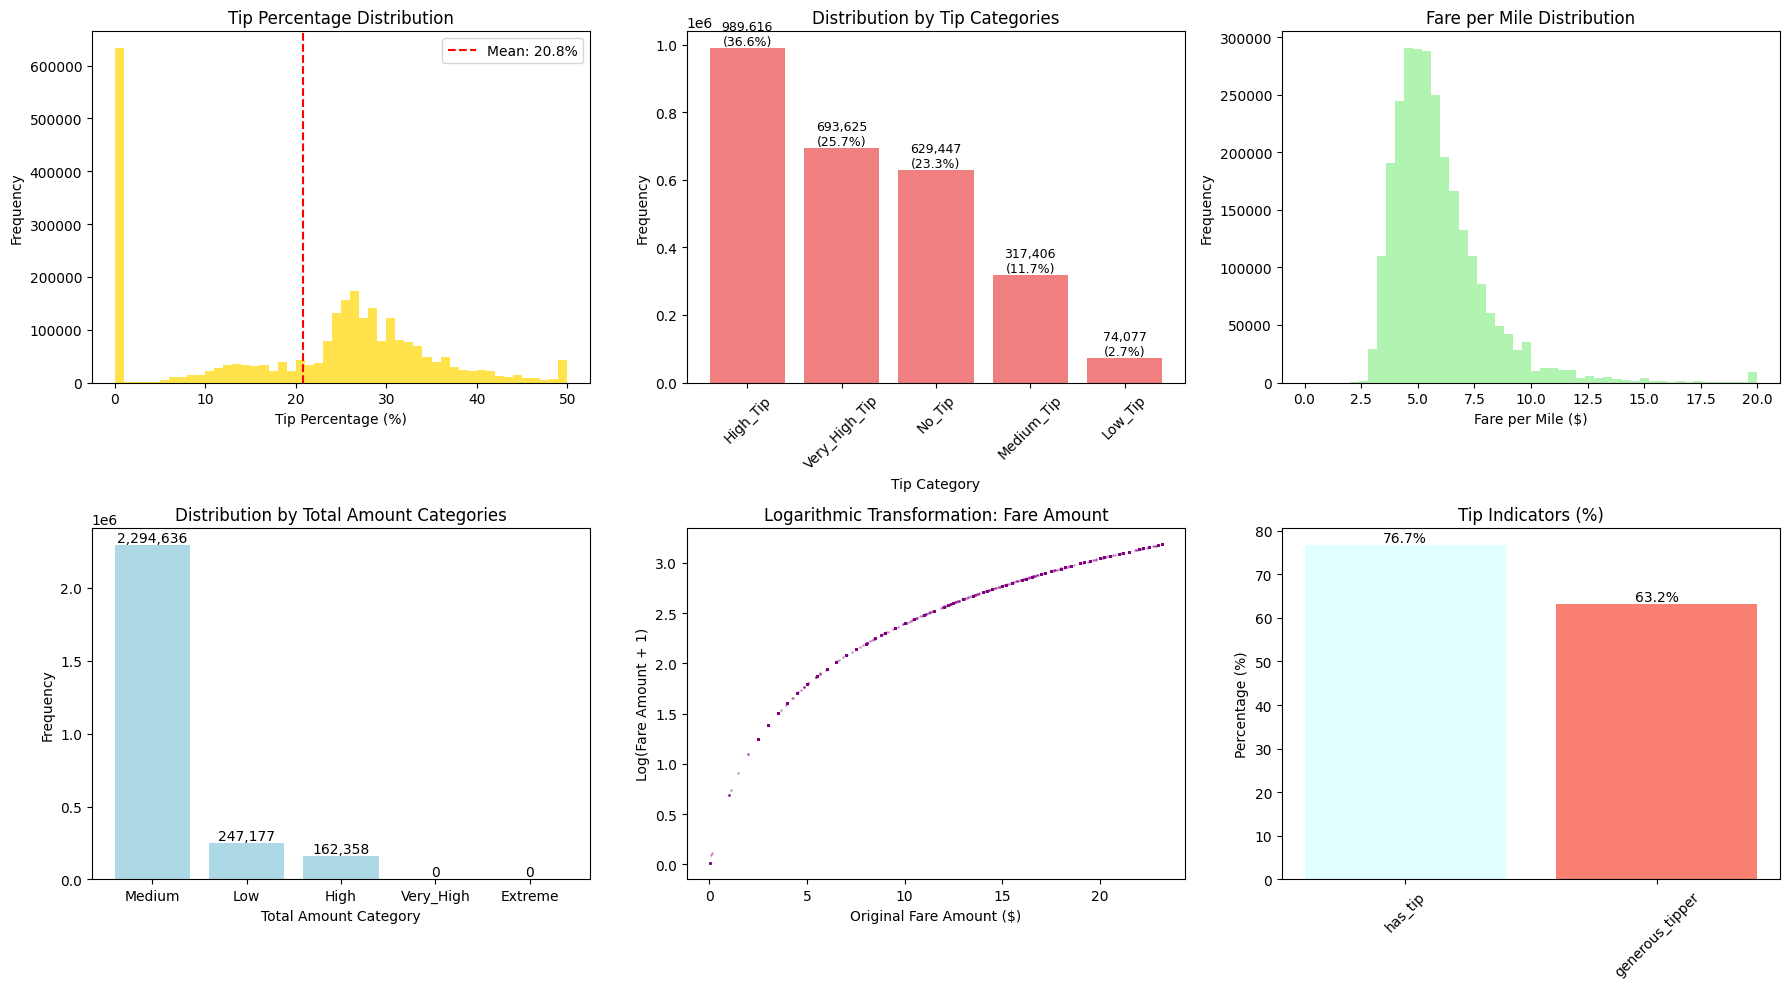


📊 FARE AND PAYMENT ANALYSIS:
   Average tip: 21.00%
   Median tip: 25.08%
   Trips without tip: 23.3%

   Average fare per mile: $6.03
   Median fare per mile: $5.46

   Generous tippers (≥20%): 63.2%

   Distribution of tip categories:
      High_Tip: 36.6%
      Very_High_Tip: 25.7%
      No_Tip: 23.3%
      Medium_Tip: 11.7%
      Low_Tip: 2.7%

   Average fare per mile: $6.03
   Median fare per mile: $5.46

   Generous tippers (≥20%): 63.2%

   Distribution of tip categories:
      High_Tip: 36.6%
      Very_High_Tip: 25.7%
      No_Tip: 23.3%
      Medium_Tip: 11.7%
      Low_Tip: 2.7%


In [6]:
# Execute fare features creation
print("💰 CREATING FARE AND PAYMENT FEATURES")
print("="*50)

# Get number of columns before
initial_cols = len(feature_engineer.df.columns)
print(f"\n📊 Columns before: {initial_cols}")

# Create fare features
fare_data = feature_engineer.create_fare_features()

# Statistics after
final_cols = len(feature_engineer.df.columns)
new_cols = final_cols - initial_cols

print(f"\n✅ FARE FEATURES CREATED:")
print(f"   New columns: {new_cols}")
print(f"   Total columns: {final_cols}")

# Show the new fare features created
fare_features = [col for col in feature_engineer.df.columns 
                if any(keyword in col.lower() for keyword in 
                      ['tip', 'fare', 'total', 'generous', 'log_'])]

print(f"\n🔍 FARE FEATURES CREATED ({len(fare_features)}):") 
for i, feature in enumerate(fare_features, 1):
    if feature_engineer.df[feature].dtype in ['object', 'category']:
        sample_values = feature_engineer.df[feature].value_counts().head(3)
        print(f"   {i:2d}. {feature:<25} - Ejemplos: {dict(sample_values)}")
    else:
        stats = feature_engineer.df[feature].describe()
        if 'percentage' in feature or 'per_mile' in feature:
            print(f"   {i:2d}. {feature:<25} - Min: {stats['min']:.2f}, Max: {stats['max']:.2f}, Mean: {stats['mean']:.2f}")
        else:
            print(f"   {i:2d}. {feature:<25} - Min: ${stats['min']:.2f}, Max: ${stats['max']:.2f}, Mean: ${stats['mean']:.2f}")

#  Fare features visualization
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

# 1. Tip percentage distribution
if 'tip_percentage' in feature_engineer.df.columns:
    tip_data = feature_engineer.df['tip_percentage'].clip(0, 50)  # Limit extreme outliers
    axes[0,0].hist(tip_data, bins=50, alpha=0.7, color='gold')
    axes[0,0].set_title('Tip Percentage Distribution')
    axes[0,0].set_xlabel('Tip Percentage (%)')
    axes[0,0].set_ylabel('Frequency')
    axes[0,0].axvline(tip_data.mean(), color='red', linestyle='--', label=f'Mean: {tip_data.mean():.1f}%')
    axes[0,0].legend()

# 2. Tip categories
if 'tip_category' in feature_engineer.df.columns:
    tip_counts = feature_engineer.df['tip_category'].value_counts()
    axes[0,1].bar(range(len(tip_counts)), tip_counts.values, color='lightcoral')
    axes[0,1].set_title('Distribution by Tip Categories')
    axes[0,1].set_xlabel('Tip Category')
    axes[0,1].set_ylabel('Frequency')
    axes[0,1].set_xticks(range(len(tip_counts)))
    axes[0,1].set_xticklabels(tip_counts.index, rotation=45)
    
    # Add values and percentages
    for i, v in enumerate(tip_counts.values):
        pct = (v / tip_counts.sum()) * 100
        axes[0,1].text(i, v, f'{v:,}\n({pct:.1f}%)', ha='center', va='bottom', fontsize=9)

# 3. Fare per mile
if 'fare_per_mile' in feature_engineer.df.columns:
    fare_per_mile_data = feature_engineer.df['fare_per_mile'].clip(0, 20)  # Limit outliers
    axes[0,2].hist(fare_per_mile_data, bins=50, alpha=0.7, color='lightgreen')
    axes[0,2].set_title('Fare per Mile Distribution')
    axes[0,2].set_xlabel('Fare per Mile ($)')
    axes[0,2].set_ylabel('Frequency')

# 4. Total amount categories
if 'total_amount_category' in feature_engineer.df.columns:
    total_counts = feature_engineer.df['total_amount_category'].value_counts()
    axes[1,0].bar(range(len(total_counts)), total_counts.values, color='lightblue')
    axes[1,0].set_title('Distribution by Total Amount Categories')
    axes[1,0].set_xlabel('Total Amount Category')
    axes[1,0].set_ylabel('Frequency')
    axes[1,0].set_xticks(range(len(total_counts)))
    axes[1,0].set_xticklabels(total_counts.index)
    
    for i, v in enumerate(total_counts.values):
        axes[1,0].text(i, v, f'{v:,}', ha='center', va='bottom')

# 5. Comparison: Fare Amount vs Log Fare Amount
if all(col in feature_engineer.df.columns for col in ['fare_amount', 'log_fare_amount']):
    axes[1,1].scatter(feature_engineer.df['fare_amount'].clip(0, 100), 
                     feature_engineer.df['log_fare_amount'], 
                     alpha=0.3, s=1, color='purple')
    axes[1,1].set_title('Logarithmic Transformation: Fare Amount')
    axes[1,1].set_xlabel('Original Fare Amount ($)')
    axes[1,1].set_ylabel('Log(Fare Amount + 1)')

# 6. Binary tip indicators
tip_indicators = ['has_tip', 'generous_tipper']
existing_tip_indicators = [col for col in tip_indicators if col in feature_engineer.df.columns]

if existing_tip_indicators:
    tip_percentages = [feature_engineer.df[col].mean() * 100 for col in existing_tip_indicators]
    colors = ['lightcyan', 'salmon'][:len(existing_tip_indicators)]
    
    bars = axes[1,2].bar(existing_tip_indicators, tip_percentages, color=colors)
    axes[1,2].set_title('Tip Indicators (%)')
    axes[1,2].set_ylabel('Percentage (%)')
    axes[1,2].set_xticklabels(existing_tip_indicators, rotation=45)
    
    # Add values above bars
    for bar, pct in zip(bars, tip_percentages):
        axes[1,2].text(bar.get_x() + bar.get_width()/2, bar.get_height(),
                      f'{pct:.1f}%', ha='center', va='bottom')

plt.tight_layout()
plt.show()

#  Detailed analysis of fare features
print(f"\n📊 FARE AND PAYMENT ANALYSIS:")

if 'tip_percentage' in feature_engineer.df.columns:
    tip_stats = feature_engineer.df['tip_percentage'].describe()
    print(f"   Average tip: {tip_stats['mean']:.2f}%")
    print(f"   Median tip: {tip_stats['50%']:.2f}%")
    
    # Trips without tip
    no_tip_pct = (feature_engineer.df['tip_percentage'] == 0).mean() * 100
    print(f"   Trips without tip: {no_tip_pct:.1f}%")

if 'fare_per_mile' in feature_engineer.df.columns:
    fpm_stats = feature_engineer.df['fare_per_mile'].describe()
    print(f"\n   Average fare per mile: ${fpm_stats['mean']:.2f}")
    print(f"   Median fare per mile: ${fpm_stats['50%']:.2f}")

if 'generous_tipper' in feature_engineer.df.columns:
    generous_pct = feature_engineer.df['generous_tipper'].mean() * 100
    print(f"\n   Generous tippers (≥20%): {generous_pct:.1f}%")
# Analysis by categories
if 'tip_category' in feature_engineer.df.columns:
    print(f"\n   Distribution of tip categories:")
    tip_dist = feature_engineer.df['tip_category'].value_counts(normalize=True) * 100
    for category, pct in tip_dist.items():
        print(f"      {category}: {pct:.1f}%")

## 7. Stage 4: Speed and Efficiency Features

2025-11-30 11:26:50,433 - INFO - Creating speed features...


🚗 CREATING SPEED AND EFFICIENCY FEATURES

📊 Columns before: 49


2025-11-30 11:26:50,903 - INFO - Speed features created



✅ SPEED FEATURES CREATED:
   New columns: 5
   Total columns: 54

🔍 SPEED FEATURES CREATED (5):
    1. avg_speed_mph             - Min: 0.02mph, Max: 423.87mph, Mean: 10.35mph
    2. speed_category            - Examples: {'Slow': np.int64(2226370), 'Medium': np.int64(307548), 'Very_Slow': np.int64(146098)}
    3. is_slow_trip              - Min: 0.00, Max: 1.00, Mean: 0.55
    4. is_fast_trip              - Min: 0.00, Max: 1.00, Mean: 0.00
    3. is_slow_trip              - Min: 0.00, Max: 1.00, Mean: 0.55
    4. is_fast_trip              - Min: 0.00, Max: 1.00, Mean: 0.00
    5. trip_efficiency           - Min: 2.04, Max: 60.00, Mean: 7.17
    5. trip_efficiency           - Min: 2.04, Max: 60.00, Mean: 7.17


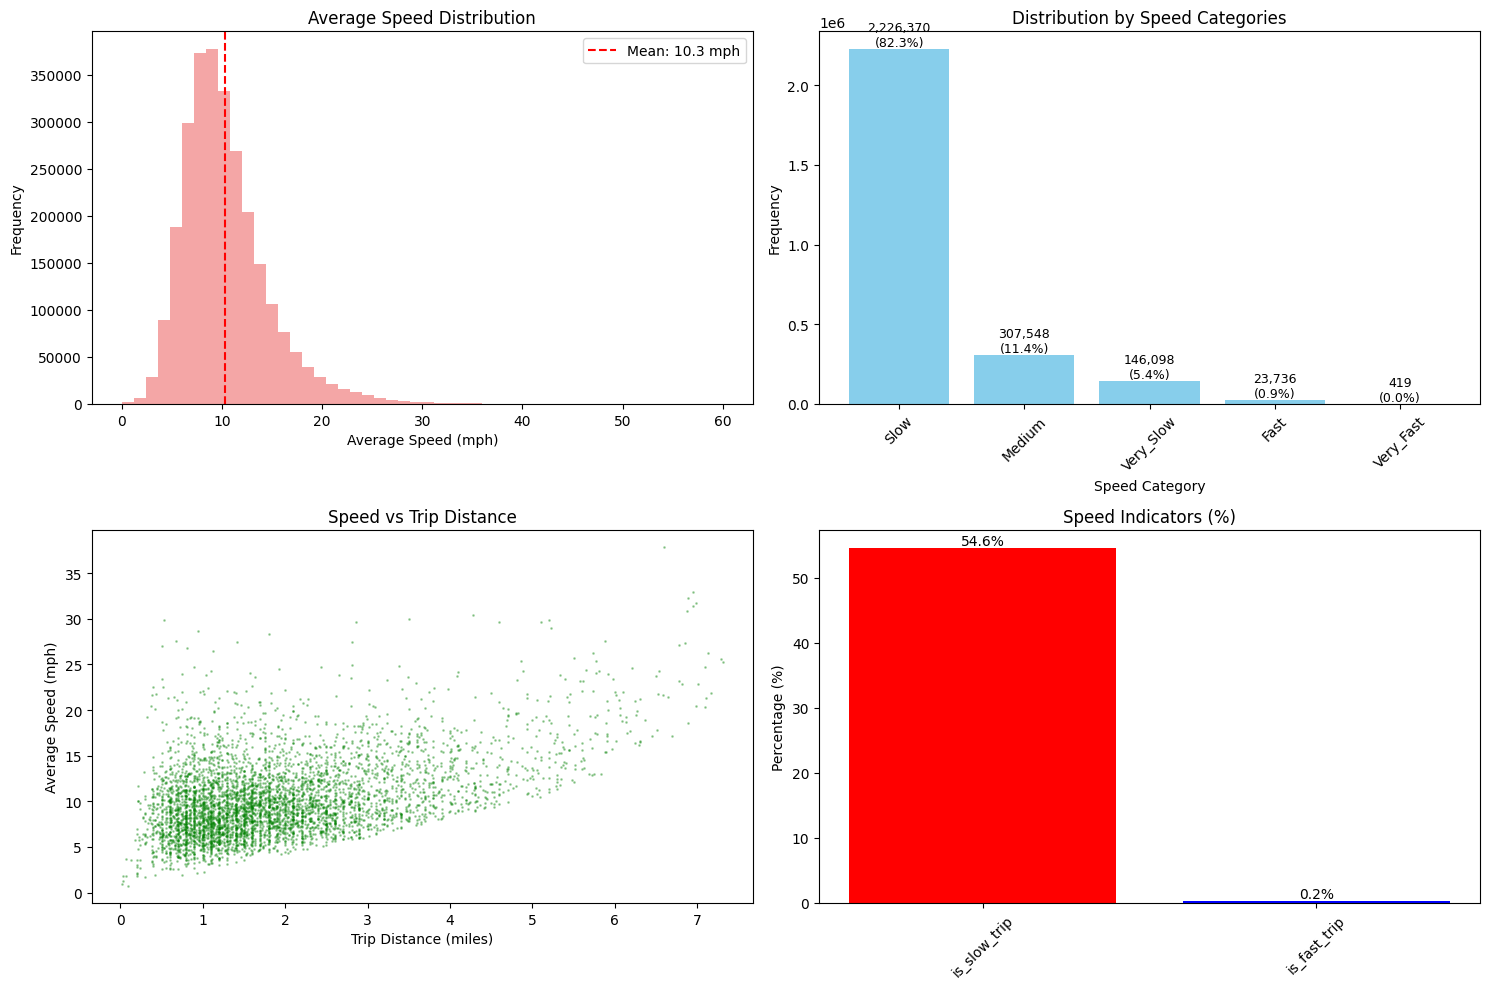


📊 SPEED AND EFFICIENCY ANALYSIS:
   Average speed: 10.35 mph
   Median speed: 9.59 mph
   Speed range: 0.02 - 423.87 mph

   Distribution by speed categories:
      Slow: 82.3%
      Medium: 11.4%
      Very_Slow: 5.4%
      Fast: 0.9%
      Very_Fast: 0.0%

   Speed indicators:
      is_slow_trip: 54.6%
      is_fast_trip: 0.2%

   Trip efficiency:
      Average: 7.169
      Median: 5.564

📈 KEY CORRELATIONS:

   Correlation matrix:
      avg_speed_mph vs trip_distance: 0.487
      avg_speed_mph vs trip_duration_minutes: -0.176
      trip_distance vs trip_duration_minutes: 0.702

   Trip efficiency:
      Average: 7.169
      Median: 5.564

📈 KEY CORRELATIONS:

   Correlation matrix:
      avg_speed_mph vs trip_distance: 0.487
      avg_speed_mph vs trip_duration_minutes: -0.176
      trip_distance vs trip_duration_minutes: 0.702


In [7]:
# Execute speed features creation
print("🚗 CREATING SPEED AND EFFICIENCY FEATURES")
print("="*50)

# Get number of columns before
initial_cols = len(feature_engineer.df.columns)
print(f"\n📊 Columns before: {initial_cols}")

# Create speed features
speed_data = feature_engineer.create_speed_features()

# Statistics after
final_cols = len(feature_engineer.df.columns)
new_cols = final_cols - initial_cols

print(f"\n✅ SPEED FEATURES CREATED:")
print(f"   New columns: {new_cols}")
print(f"   Total columns: {final_cols}")

# Show the new speed features created
speed_features = [col for col in feature_engineer.df.columns 
                 if any(keyword in col.lower() for keyword in 
                       ['speed', 'efficiency', 'slow', 'fast'])]

print(f"\n🔍 SPEED FEATURES CREATED ({len(speed_features)}):") 
for i, feature in enumerate(speed_features, 1):
    if feature_engineer.df[feature].dtype in ['object', 'category']:
        sample_values = feature_engineer.df[feature].value_counts().head(3)
        print(f"   {i:2d}. {feature:<25} - Examples: {dict(sample_values)}")
    else:
        stats = feature_engineer.df[feature].describe()
        unit = "mph" if "speed" in feature else ""
        print(f"   {i:2d}. {feature:<25} - Min: {stats['min']:.2f}{unit}, Max: {stats['max']:.2f}{unit}, Mean: {stats['mean']:.2f}{unit}")

# Visualization of speed features
if 'avg_speed_mph' in feature_engineer.df.columns:
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    
    # 1. Average speed distribution
    speed_data_clipped = feature_engineer.df['avg_speed_mph'].clip(0, 60)  # Limit outliers
    axes[0,0].hist(speed_data_clipped, bins=50, alpha=0.7, color='lightcoral')
    axes[0,0].set_title('Average Speed Distribution')
    axes[0,0].set_xlabel('Average Speed (mph)')
    axes[0,0].set_ylabel('Frequency')
    axes[0,0].axvline(speed_data_clipped.mean(), color='red', linestyle='--', 
                     label=f'Mean: {speed_data_clipped.mean():.1f} mph')
    axes[0,0].legend()
    
    # 2. Speed categories
    if 'speed_category' in feature_engineer.df.columns:
        speed_counts = feature_engineer.df['speed_category'].value_counts()
        axes[0,1].bar(range(len(speed_counts)), speed_counts.values, color='skyblue')
        axes[0,1].set_title('Distribution by Speed Categories')
        axes[0,1].set_xlabel('Speed Category')
        axes[0,1].set_ylabel('Frequency')
        axes[0,1].set_xticks(range(len(speed_counts)))
        axes[0,1].set_xticklabels(speed_counts.index, rotation=45)
        
        # Add values above bars
        for i, v in enumerate(speed_counts.values):
            pct = (v / speed_counts.sum()) * 100
            axes[0,1].text(i, v, f'{v:,}\n({pct:.1f}%)', ha='center', va='bottom', fontsize=9)
    
    # 3. Speed vs distance relationship
    if 'trip_distance' in feature_engineer.df.columns:
        # Create scatter plot with sample for better visualization
        sample_size = min(5000, len(feature_engineer.df))
        sample_data = feature_engineer.df.sample(n=sample_size, random_state=42)
        
        axes[1,0].scatter(sample_data['trip_distance'].clip(0, 20), 
                         sample_data['avg_speed_mph'].clip(0, 60),
                         alpha=0.3, s=1, color='green')
        axes[1,0].set_title('Speed vs Trip Distance')
        axes[1,0].set_xlabel('Trip Distance (miles)')
        axes[1,0].set_ylabel('Average Speed (mph)')
    
    # 4. Binary speed indicators
    speed_indicators = ['is_slow_trip', 'is_fast_trip']
    existing_indicators = [col for col in speed_indicators if col in feature_engineer.df.columns]
    
    if existing_indicators:
        indicator_percentages = [feature_engineer.df[col].mean() * 100 for col in existing_indicators]
        colors = ['red', 'blue'][:len(existing_indicators)]
        
        bars = axes[1,1].bar(existing_indicators, indicator_percentages, color=colors)
        axes[1,1].set_title('Speed Indicators (%)')
        axes[1,1].set_ylabel('Percentage (%)')
        axes[1,1].set_xticklabels(existing_indicators, rotation=45)
        
        # Add values above bars
        for bar, pct in zip(bars, indicator_percentages):
            axes[1,1].text(bar.get_x() + bar.get_width()/2, bar.get_height(),
                          f'{pct:.1f}%', ha='center', va='bottom')
    
    plt.tight_layout()
    plt.show()

# Detailed speed analysis
print(f"\n📊 SPEED AND EFFICIENCY ANALYSIS:")

if 'avg_speed_mph' in feature_engineer.df.columns:
    speed_stats = feature_engineer.df['avg_speed_mph'].describe()
    print(f"   Average speed: {speed_stats['mean']:.2f} mph")
    print(f"   Median speed: {speed_stats['50%']:.2f} mph")
    print(f"   Speed range: {speed_stats['min']:.2f} - {speed_stats['max']:.2f} mph")

# Analysis by speed categories
if 'speed_category' in feature_engineer.df.columns:
    print(f"\n   Distribution by speed categories:")
    speed_dist = feature_engineer.df['speed_category'].value_counts(normalize=True) * 100
    for category, pct in speed_dist.items():
        print(f"      {category}: {pct:.1f}%")

# Binary indicators analysis
speed_binary_features = ['is_slow_trip', 'is_fast_trip']
existing_binary_speed = [col for col in speed_binary_features if col in feature_engineer.df.columns]

if existing_binary_speed:
    print(f"\n   Speed indicators:")
    for feature in existing_binary_speed:
        pct = feature_engineer.df[feature].mean() * 100
        print(f"      {feature}: {pct:.1f}%")

# Efficiency analysis if exists
if 'trip_efficiency' in feature_engineer.df.columns:
    eff_stats = feature_engineer.df['trip_efficiency'].describe()
    print(f"\n   Trip efficiency:")
    print(f"      Average: {eff_stats['mean']:.3f}")
    print(f"      Median: {eff_stats['50%']:.3f}")

# Correlation between speed, distance and duration
print(f"\n📈 KEY CORRELATIONS:")
correlation_cols = ['avg_speed_mph', 'trip_distance', 'trip_duration_minutes']
existing_corr_cols = [col for col in correlation_cols if col in feature_engineer.df.columns]

if len(existing_corr_cols) >= 2:
    corr_matrix = feature_engineer.df[existing_corr_cols].corr()
    print(f"\n   Correlation matrix:")
    for i, col1 in enumerate(existing_corr_cols):
        for j, col2 in enumerate(existing_corr_cols):
            if i < j:  # Only show upper half
                corr_value = corr_matrix.loc[col1, col2]
                print(f"      {col1} vs {col2}: {corr_value:.3f}")

## 8. Stage 5: Enhanced Categorical Features

2025-11-30 11:27:16,174 - INFO - Creating categorical features...


🏷️ CREATING ENHANCED CATEGORICAL FEATURES

📊 Columns before: 54


2025-11-30 11:27:17,236 - INFO - Categorical features created



✅ CATEGORICAL FEATURES CREATED:
   New columns: 14
   Total columns: 68

🔍 ENHANCED CATEGORICAL FEATURES (12):
    1. vendor_name               - 2 categories, Examples: {'Curb_Mobility': np.int64(1922799), 'Creative_Mobile': np.int64(781372)}
    2. ratecode_name             - 6 categories, Examples: {'Standard': np.int64(2700982), 'Unknown': np.int64(2339)}
    1. vendor_name               - 2 categories, Examples: {'Curb_Mobility': np.int64(1922799), 'Creative_Mobile': np.int64(781372)}
    2. ratecode_name             - 6 categories, Examples: {'Standard': np.int64(2700982), 'Unknown': np.int64(2339)}
    3. is_airport_trip           - 0.0% = 1
    4. is_jfk_trip               - 0.0% = 1
    5. is_newark_trip            - 0.0% = 1
    3. is_airport_trip           - 0.0% = 1
    4. is_jfk_trip               - 0.0% = 1
    5. is_newark_trip            - 0.0% = 1
    6. payment_name              - 4 categories, Examples: {'Credit_Card': np.int64(2141156), 'Cash': np.int64(554470)}
  

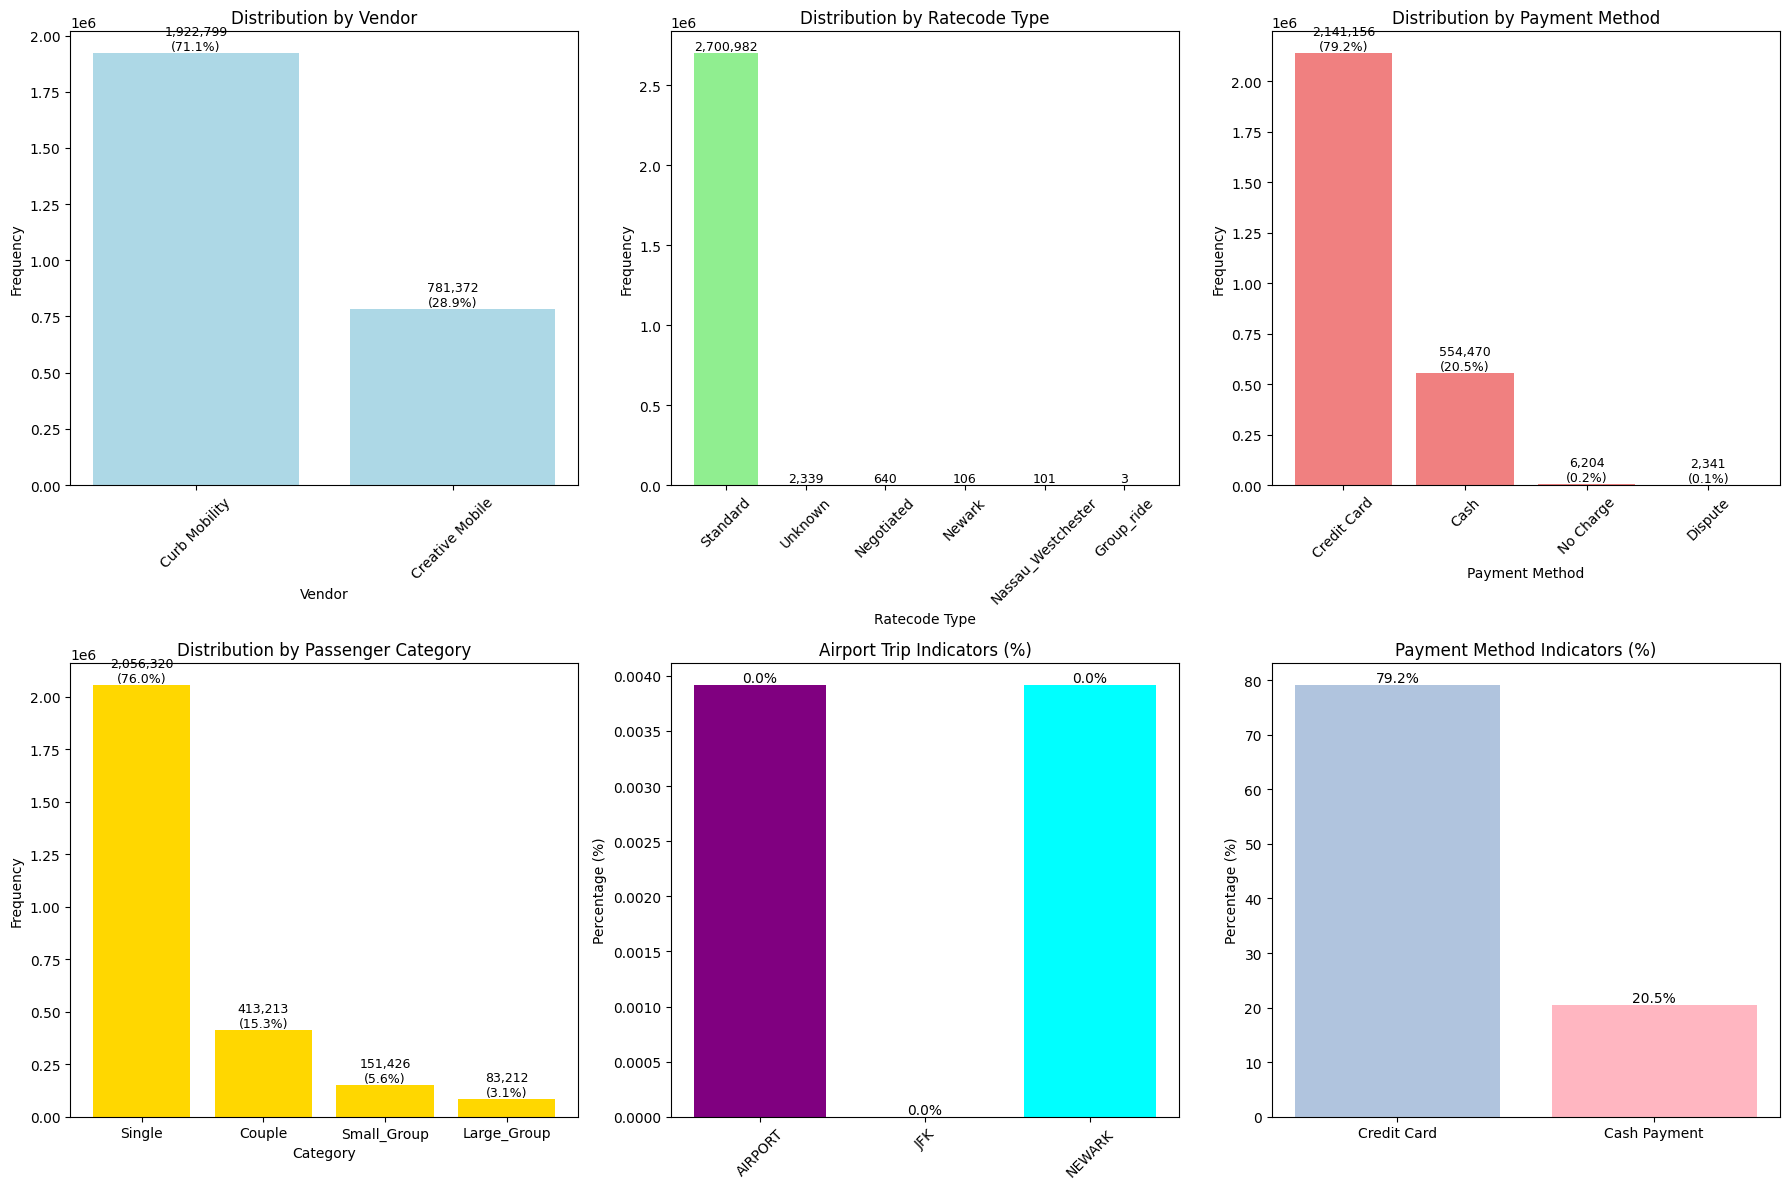


📊 DETAILED ANALYSIS OF CATEGORICAL FEATURES:

   Distribution by vendors:
      Curb Mobility: 71.1%
      Creative Mobile: 28.9%

   Distribution by ratecode types:
      Standard: 99.9%
      Unknown: 0.1%
      Negotiated: 0.0%
      Newark: 0.0%
      Nassau_Westchester: 0.0%
      Group_ride: 0.0%

   Distribución por métodos de pago:
      Credit Card: 79.2%
      Cash: 20.5%
      No Charge: 0.2%
      Dispute: 0.1%

   Indicadores especiales:
      Airport Trip: 0.0%
      Standard Rate: 99.9%
      Single Passenger: 76.0%
      Group Trip: 8.7%
      Credit Card: 79.2%
      Cash: 20.5%
      No Charge: 0.2%
      Dispute: 0.1%

   Indicadores especiales:
      Airport Trip: 0.0%
      Standard Rate: 99.9%
      Single Passenger: 76.0%
      Group Trip: 8.7%


In [8]:
# Execute enhanced categorical features creation
print("🏷️ CREATING ENHANCED CATEGORICAL FEATURES")
print("="*50)

# Get number of columns before
initial_cols = len(feature_engineer.df.columns)
print(f"\n📊 Columns before: {initial_cols}")

# Create categorical features
categorical_data = feature_engineer.create_categorical_features()

# Statistics after
final_cols = len(feature_engineer.df.columns)
new_cols = final_cols - initial_cols

print(f"\n✅ CATEGORICAL FEATURES CREATED:")
print(f"   New columns: {new_cols}")
print(f"   Total columns: {final_cols}")

# Show the new categorical features created
categorical_features = [col for col in feature_engineer.df.columns 
                       if any(keyword in col.lower() for keyword in 
                             ['vendor_name', 'ratecode_name', 'payment_name', 'passenger_category',
                              'is_airport', 'is_jfk', 'is_newark', 'is_credit', 'is_cash', 'is_single', 'is_group', 'is_store'])]

print(f"\n🔍 ENHANCED CATEGORICAL FEATURES ({len(categorical_features)}):") 
for i, feature in enumerate(categorical_features, 1):
    if feature_engineer.df[feature].dtype in ['object', 'category']:
        unique_values = feature_engineer.df[feature].nunique()
        sample_values = feature_engineer.df[feature].value_counts().head(2)
        print(f"   {i:2d}. {feature:<25} - {unique_values} categories, Examples: {dict(sample_values)}")
    else:
        # For binary indicators
        pct = feature_engineer.df[feature].mean() * 100
        print(f"   {i:2d}. {feature:<25} - {pct:.1f}% = 1")

# Visualization of categorical features
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# 1. Distribution of vendors
if 'vendor_name' in feature_engineer.df.columns:
    vendor_counts = feature_engineer.df['vendor_name'].value_counts()
    axes[0,0].bar(range(len(vendor_counts)), vendor_counts.values, color='lightblue')
    axes[0,0].set_title('Distribution by Vendor')
    axes[0,0].set_xlabel('Vendor')
    axes[0,0].set_ylabel('Frequency')
    axes[0,0].set_xticks(range(len(vendor_counts)))
    axes[0,0].set_xticklabels([name.replace('_', ' ') for name in vendor_counts.index], rotation=45)
    
    for i, v in enumerate(vendor_counts.values):
        pct = (v / vendor_counts.sum()) * 100
        axes[0,0].text(i, v, f'{v:,}\n({pct:.1f}%)', ha='center', va='bottom', fontsize=9)

# 2. Ratecode types
if 'ratecode_name' in feature_engineer.df.columns:
    rate_counts = feature_engineer.df['ratecode_name'].value_counts()
    axes[0,1].bar(range(len(rate_counts)), rate_counts.values, color='lightgreen')
    axes[0,1].set_title('Distribution by Ratecode Type')
    axes[0,1].set_xlabel('Ratecode Type')
    axes[0,1].set_ylabel('Frequency')
    axes[0,1].set_xticks(range(len(rate_counts)))
    axes[0,1].set_xticklabels(rate_counts.index, rotation=45)
    
    for i, v in enumerate(rate_counts.values):
        if v > 0:
            axes[0,1].text(i, v, f'{v:,}', ha='center', va='bottom', fontsize=9)

# 3. Payment methods
if 'payment_name' in feature_engineer.df.columns:
    payment_counts = feature_engineer.df['payment_name'].value_counts()
    axes[0,2].bar(range(len(payment_counts)), payment_counts.values, color='lightcoral')
    axes[0,2].set_title('Distribution by Payment Method')
    axes[0,2].set_xlabel('Payment Method')
    axes[0,2].set_ylabel('Frequency')
    axes[0,2].set_xticks(range(len(payment_counts)))
    axes[0,2].set_xticklabels([name.replace('_', ' ') for name in payment_counts.index], rotation=45)
    
    for i, v in enumerate(payment_counts.values):
        pct = (v / payment_counts.sum()) * 100
        axes[0,2].text(i, v, f'{v:,}\n({pct:.1f}%)', ha='center', va='bottom', fontsize=9)

# 4. Passenger categories
if 'passenger_category' in feature_engineer.df.columns:
    passenger_counts = feature_engineer.df['passenger_category'].value_counts()
    axes[1,0].bar(range(len(passenger_counts)), passenger_counts.values, color='gold')
    axes[1,0].set_title('Distribution by Passenger Category')
    axes[1,0].set_xlabel('Category')
    axes[1,0].set_ylabel('Frequency')
    axes[1,0].set_xticks(range(len(passenger_counts)))
    axes[1,0].set_xticklabels(passenger_counts.index)
    
    for i, v in enumerate(passenger_counts.values):
        pct = (v / passenger_counts.sum()) * 100
        axes[1,0].text(i, v, f'{v:,}\n({pct:.1f}%)', ha='center', va='bottom', fontsize=9)

# 5. Airport indicators
airport_indicators = ['is_airport_trip', 'is_jfk_trip', 'is_newark_trip']
existing_airport = [col for col in airport_indicators if col in feature_engineer.df.columns]

if existing_airport:
    airport_percentages = [feature_engineer.df[col].mean() * 100 for col in existing_airport]
    labels = [col.replace('is_', '').replace('_trip', '').upper() for col in existing_airport]
    colors = ['purple', 'orange', 'cyan'][:len(existing_airport)]
    
    bars = axes[1,1].bar(labels, airport_percentages, color=colors)
    axes[1,1].set_title('Airport Trip Indicators (%)')
    axes[1,1].set_ylabel('Percentage (%)')
    axes[1,1].set_xticklabels(labels, rotation=45)
    
    for bar, pct in zip(bars, airport_percentages):
        axes[1,1].text(bar.get_x() + bar.get_width()/2, bar.get_height(),
                      f'{pct:.1f}%', ha='center', va='bottom')

# 6. Payment indicators
payment_indicators = ['is_credit_card', 'is_cash_payment']
existing_payment = [col for col in payment_indicators if col in feature_engineer.df.columns]

if existing_payment:
    payment_percentages = [feature_engineer.df[col].mean() * 100 for col in existing_payment]
    labels = [col.replace('is_', '').replace('_', ' ').title() for col in existing_payment]
    colors = ['lightsteelblue', 'lightpink'][:len(existing_payment)]
    
    bars = axes[1,2].bar(labels, payment_percentages, color=colors)
    axes[1,2].set_title('Payment Method Indicators (%)')
    axes[1,2].set_ylabel('Percentage (%)')
    
    for bar, pct in zip(bars, payment_percentages):
        axes[1,2].text(bar.get_x() + bar.get_width()/2, bar.get_height(),
                      f'{pct:.1f}%', ha='center', va='bottom')

plt.tight_layout()
plt.show()

# Detailed analysis of categorical features
print(f"\n📊 DETAILED ANALYSIS OF CATEGORICAL FEATURES:")

# Analysis of vendors
if 'vendor_name' in feature_engineer.df.columns:
    print(f"\n   Distribution by vendors:")
    vendor_dist = feature_engineer.df['vendor_name'].value_counts(normalize=True) * 100
    for vendor, pct in vendor_dist.items():
        print(f"      {vendor.replace('_', ' ')}: {pct:.1f}%")

# Analysis of ratecode types
if 'ratecode_name' in feature_engineer.df.columns:
    print(f"\n   Distribution by ratecode types:")
    rate_dist = feature_engineer.df['ratecode_name'].value_counts(normalize=True) * 100
    for rate, pct in rate_dist.items():
        print(f"      {rate}: {pct:.1f}%")

# Análisis de métodos de pago
if 'payment_name' in feature_engineer.df.columns:
    print(f"\n   Distribución por métodos de pago:")
    payment_dist = feature_engineer.df['payment_name'].value_counts(normalize=True) * 100
    for payment, pct in payment_dist.items():
        print(f"      {payment.replace('_', ' ')}: {pct:.1f}%")

# Análisis de indicadores especiales
special_indicators = ['is_airport_trip', 'is_standard_rate', 'is_single_passenger', 'is_group_trip']
existing_special = [col for col in special_indicators if col in feature_engineer.df.columns]

if existing_special:
    print(f"\n   Indicadores especiales:")
    for indicator in existing_special:
        pct = feature_engineer.df[indicator].mean() * 100
        description = indicator.replace('is_', '').replace('_', ' ').title()
        print(f"      {description}: {pct:.1f}%")

## 9. Stages 6-10: Complete Pipeline for Remaining Features

2025-11-30 11:27:34,661 - INFO - Creating location features...


🔧 EXECUTING REMAINING PIPELINE STAGES

📊 Columns before remaining stages: 68

📍 Stage 6: Location Features...


2025-11-30 11:27:36,927 - INFO - Location features created
2025-11-30 11:27:36,930 - INFO - Creating interaction features...
2025-11-30 11:27:36,930 - INFO - Creating interaction features...


🔗 Stage 7: Interaction Features...


2025-11-30 11:27:37,131 - INFO - Interaction features created
2025-11-30 11:27:37,133 - INFO - Creating statistical features...
2025-11-30 11:27:37,133 - INFO - Creating statistical features...


📊 Stage 8: Statistical Features...


2025-11-30 11:27:37,813 - INFO - Statistical features created
2025-11-30 11:27:37,815 - INFO - Applying encoding to categorical variables...
2025-11-30 11:27:37,815 - INFO - Applying encoding to categorical variables...


🔢 Stage 9: Categorical Variables Encoding...


2025-11-30 11:27:45,895 - INFO - Categorical variable encoding completed



✅ REMAINING STAGES COMPLETED:
   Columns added in stages 6-9: 42
   Final total columns: 110

🔍 NEW FEATURES BY CATEGORY:
   📍 Location (5): ['is_round_trip', 'route_id', 'pickup_popularity']...
   🔗 Interaction (5): ['weekend_rush', 'credit_card_with_tip', 'long_distance_long_time']...
   📊 Statistics (8): ['hourly_fare_amount_mean', 'hourly_fare_amount_std', 'hourly_trip_distance_mean']...
   🔢 Encoding (12): ['distance_category_encoded', 'duration_category_encoded', 'speed_category_encoded']...


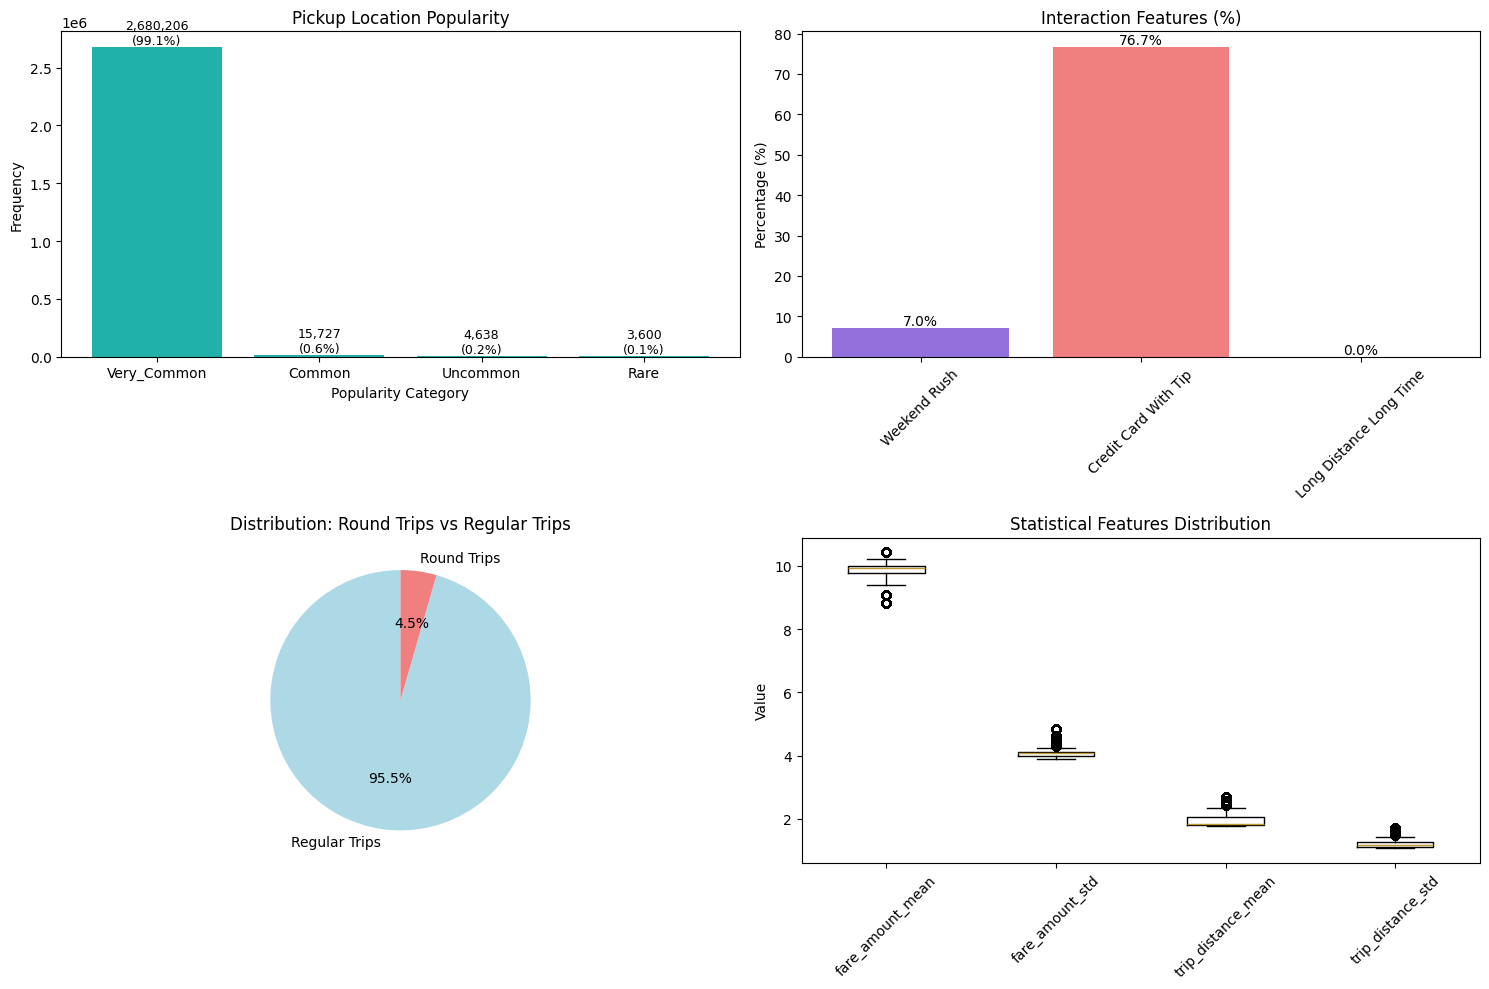


📊 ADDITIONAL FEATURES ANALYSIS:
   Round trips (same origin and destination): 4.46%
   Average location popularity: 73469 trips
   Most popular location: 154010 trips

   Interaction features:
      Weekend Rush: 7.0%
      Credit Card With Tip: 76.7%
      Long Distance Long Time: 0.0%

   Statistical features created: 8
   Examples: ['hourly_fare_amount_mean', 'hourly_fare_amount_std', 'hourly_trip_distance_mean']

   Encoded variables: 12
      Dummy variables (one-hot): 7
      Ordinal encoded variables: 5


In [9]:
# Execute remaining stages of the features pipeline
print("🔧 EXECUTING REMAINING PIPELINE STAGES")
print("="*60)

# Get number of columns before remaining stages
initial_cols = len(feature_engineer.df.columns)
print(f"\n📊 Columns before remaining stages: {initial_cols}")

# Stage 6: Location Features
print("\n📍 Stage 6: Location Features...")
location_data = feature_engineer.create_location_features()

# Stage 7: Interaction Features
print("🔗 Stage 7: Interaction Features...")
interaction_data = feature_engineer.create_interaction_features()

# Stage 8: Statistical Features
print("📊 Stage 8: Statistical Features...")
statistical_data = feature_engineer.create_statistical_features()

# Stage 9: Categorical Encoding
print("🔢 Stage 9: Categorical Variables Encoding...")
encoded_data = feature_engineer.encode_categorical_variables()

# Final statistics
final_cols = len(feature_engineer.df.columns)
new_cols = final_cols - initial_cols

print(f"\n✅ REMAINING STAGES COMPLETED:")
print(f"   Columns added in stages 6-9: {new_cols}")
print(f"   Final total columns: {final_cols}")

# Summary of new features by category
location_features = [col for col in feature_engineer.df.columns 
                    if any(keyword in col.lower() for keyword in 
                          ['round_trip', 'route_id', 'popularity'])]

interaction_features = [col for col in feature_engineer.df.columns 
                       if any(keyword in col.lower() for keyword in 
                             ['weekend_rush', 'credit_card_with_tip', 'long_distance_long_time', 
                              'airport_morning', 'airport_evening'])]

statistical_features = [col for col in feature_engineer.df.columns 
                       if any(keyword in col.lower() for keyword in 
                             ['hourly_', 'daily_avg_'])]

encoded_features = [col for col in feature_engineer.df.columns 
                   if any(keyword in col for keyword in 
                         ['_encoded', 'time_of_day_', 'vendor_name_', 'payment_name_'])]

print(f"\n🔍 NEW FEATURES BY CATEGORY:")
print(f"   📍 Location ({len(location_features)}): {location_features[:3]}{'...' if len(location_features) > 3 else ''}")
print(f"   🔗 Interaction ({len(interaction_features)}): {interaction_features[:3]}{'...' if len(interaction_features) > 3 else ''}")
print(f"   📊 Statistics ({len(statistical_features)}): {statistical_features[:3]}{'...' if len(statistical_features) > 3 else ''}")
print(f"   🔢 Encoding ({len(encoded_features)}): {encoded_features[:3]}{'...' if len(encoded_features) > 3 else ''}")

# Visualization of location and interaction features
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# 1. Pickup location popularity
if 'pickup_popularity_category' in feature_engineer.df.columns:
    pop_counts = feature_engineer.df['pickup_popularity_category'].value_counts()
    axes[0,0].bar(range(len(pop_counts)), pop_counts.values, color='lightseagreen')
    axes[0,0].set_title('Pickup Location Popularity')
    axes[0,0].set_xlabel('Popularity Category')
    axes[0,0].set_ylabel('Frequency')
    axes[0,0].set_xticks(range(len(pop_counts)))
    axes[0,0].set_xticklabels(pop_counts.index)
    
    for i, v in enumerate(pop_counts.values):
        pct = (v / pop_counts.sum()) * 100
        axes[0,0].text(i, v, f'{v:,}\n({pct:.1f}%)', ha='center', va='bottom', fontsize=9)

# 2. Interaction features
interaction_cols = ['weekend_rush', 'credit_card_with_tip', 'long_distance_long_time']
existing_interactions = [col for col in interaction_cols if col in feature_engineer.df.columns]

if existing_interactions:
    interaction_percentages = [feature_engineer.df[col].mean() * 100 for col in existing_interactions]
    labels = [col.replace('_', ' ').title() for col in existing_interactions]
    colors = ['mediumpurple', 'lightcoral', 'gold'][:len(existing_interactions)]
    
    bars = axes[0,1].bar(labels, interaction_percentages, color=colors)
    axes[0,1].set_title('Interaction Features (%)')
    axes[0,1].set_ylabel('Percentage (%)')
    axes[0,1].set_xticklabels(labels, rotation=45)
    
    for bar, pct in zip(bars, interaction_percentages):
        axes[0,1].text(bar.get_x() + bar.get_width()/2, bar.get_height(),
                      f'{pct:.1f}%', ha='center', va='bottom')

# 3. Round trips distribution
if 'is_round_trip' in feature_engineer.df.columns:
    round_trip_pct = feature_engineer.df['is_round_trip'].mean() * 100
    regular_trip_pct = 100 - round_trip_pct
    
    axes[1,0].pie([regular_trip_pct, round_trip_pct], 
                 labels=['Regular Trips', 'Round Trips'],
                 colors=['lightblue', 'lightcoral'],
                 autopct='%1.1f%%',
                 startangle=90)
    axes[1,0].set_title('Distribution: Round Trips vs Regular Trips')

# 4. Sample of statistical features
if statistical_features:
    # Select some statistical features to show
    sample_stats = statistical_features[:4] if len(statistical_features) >= 4 else statistical_features
    
    if sample_stats and all(col in feature_engineer.df.columns for col in sample_stats):
        stats_data = [feature_engineer.df[col] for col in sample_stats]
        axes[1,1].boxplot(stats_data, labels=[col.replace('hourly_', '').replace('daily_avg_', '') for col in sample_stats])
        axes[1,1].set_title('Statistical Features Distribution')
        axes[1,1].set_ylabel('Value')
        axes[1,1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# Detailed analysis of new features
print(f"\n📊 ADDITIONAL FEATURES ANALYSIS:")

# Location analysis
if 'is_round_trip' in feature_engineer.df.columns:
    round_trip_pct = feature_engineer.df['is_round_trip'].mean() * 100
    print(f"   Round trips (same origin and destination): {round_trip_pct:.2f}%")

if 'pickup_popularity' in feature_engineer.df.columns:
    pop_stats = feature_engineer.df['pickup_popularity'].describe()
    print(f"   Average location popularity: {pop_stats['mean']:.0f} trips")
    print(f"   Most popular location: {pop_stats['max']:.0f} trips")

# Interaction analysis
if existing_interactions:
    print(f"\n   Interaction features:")
    for col in existing_interactions:
        pct = feature_engineer.df[col].mean() * 100
        description = col.replace('_', ' ').title()
        print(f"      {description}: {pct:.1f}%")

# Statistical features analysis
if statistical_features:
    print(f"\n   Statistical features created: {len(statistical_features)}")
    print(f"   Examples: {statistical_features[:3]}")

# Encoding analysis
if encoded_features:
    print(f"\n   Encoded variables: {len(encoded_features)}")
    
    # Count dummy variables created
    dummy_features = [col for col in encoded_features if any(prefix in col for prefix in ['time_of_day_', 'vendor_name_', 'payment_name_'])]
    ordinal_features = [col for col in encoded_features if '_encoded' in col]
    
    print(f"      Dummy variables (one-hot): {len(dummy_features)}")
    print(f"      Ordinal encoded variables: {len(ordinal_features)}")

## 10. Final Summary and Feature Validation

📋 COMPLETE FEATURE ENGINEERING SUMMARY

📊 GENERAL STATISTICS:
   Total features: 110
   Numeric variables: 69
   Categorical variables: 20
   Datetime variables: 2
   Binary indicators: 31
   Dataset size: (2704171, 110)
   Memory usage: 2517.72 MB

🔍 ANALYSIS BY VARIABLE TYPE:

📊 GENERAL STATISTICS:
   Total features: 110
   Numeric variables: 69
   Categorical variables: 20
   Datetime variables: 2
   Binary indicators: 31
   Dataset size: (2704171, 110)
   Memory usage: 2517.72 MB

🔍 ANALYSIS BY VARIABLE TYPE:
   Continuous variables: 38
   Top continuous variables:
       1. VendorID                  - Range: 1.00
       2. passenger_count           - Range: 5.00
       3. trip_distance             - Range: 7.42
       4. RatecodeID                - Range: 98.00
       5. PULocationID              - Range: 264.00
       6. DOLocationID              - Range: 264.00
       7. payment_type              - Range: 3.00
       8. fare_amount               - Range: 23.19
       9. extra   

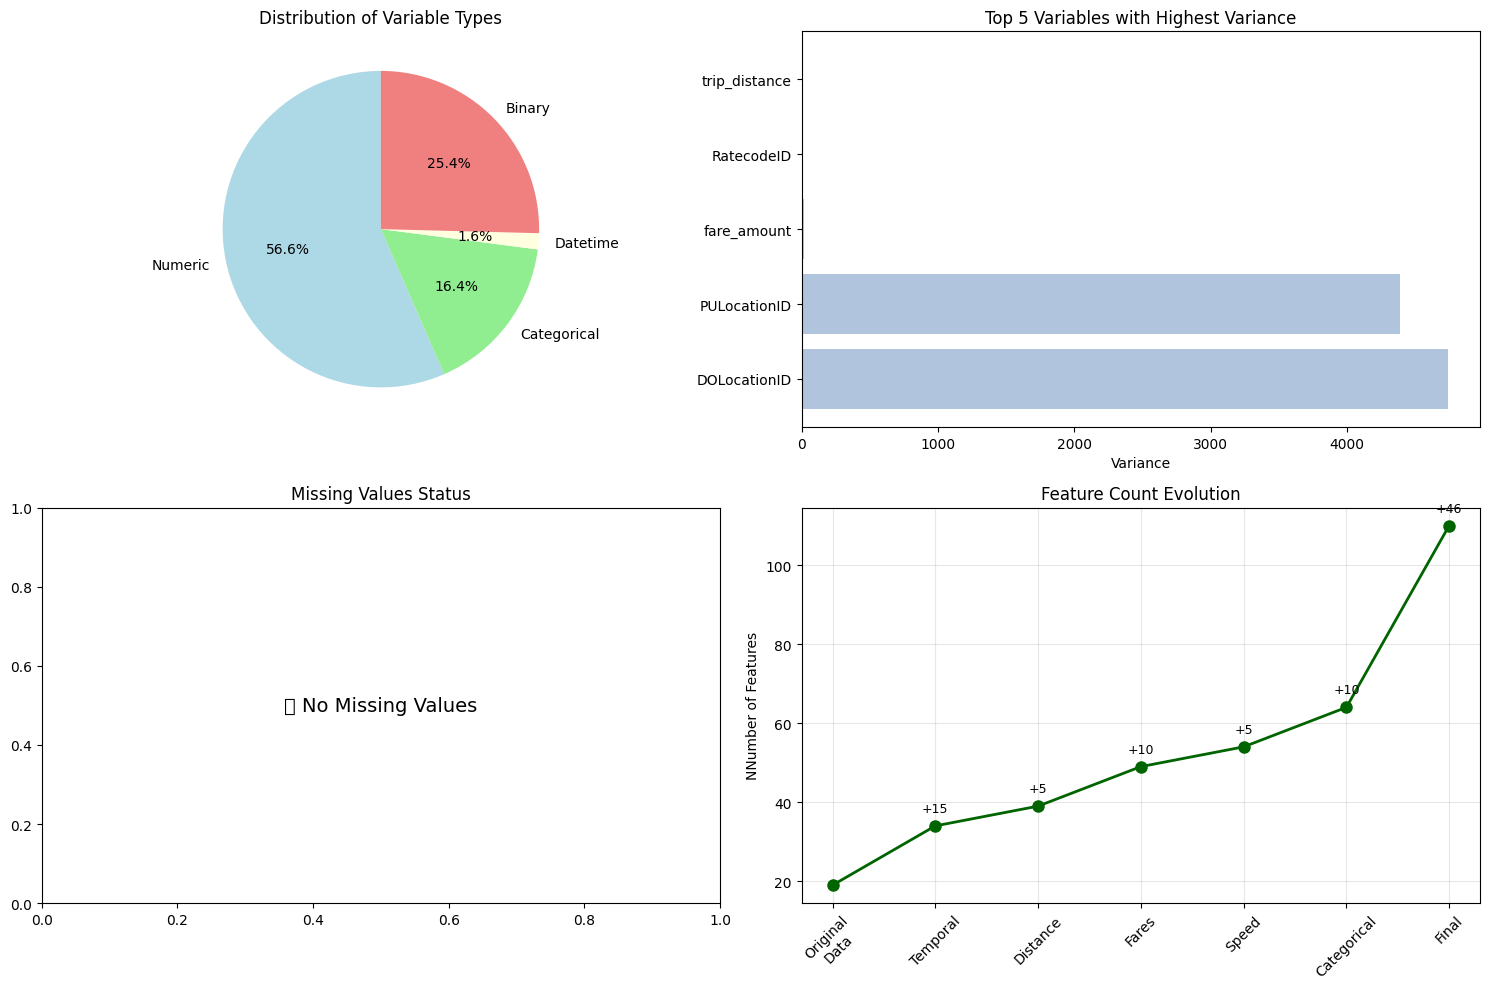


🔍 DATA QUALITY VALIDATION:
   Columns with infinite values: 0
   Columns with infinite values: 0
   Duplicate records: 0
   Duplicate records: 0
   Constant columns (no variation): 5
      ['pickup_month', 'is_long_trip', 'is_long_distance', 'is_jfk_trip', 'long_distance_long_time']

🎯 FEATURES BY THEMATIC CATEGORY:
   Temporales  :  30 features
   Geográficas :   7 features
   Monetarias  :  20 features
   Operacionales:  16 features
   Categóricas :  22 features
   Interacción :   3 features
   Estadísticas:   8 features
   Encoding    :  13 features

✅ FEATURE ENGINEERING PIPELINE COMPLETED

📈 IMPROVEMENTS ACHIEVED:
   • Original dataset: ~19 columns
   • Enriched dataset: 110 features
   • Increase: 91 new features
   • 31 binary indicators for specific patterns
   • 38 continuous variables for modeling
   • Complete encoding for categorical variables
   Constant columns (no variation): 5
      ['pickup_month', 'is_long_trip', 'is_long_distance', 'is_jfk_trip', 'long_distance_long

In [10]:
# Generate complete feature summary
print("📋 COMPLETE FEATURE ENGINEERING SUMMARY")
print("="*70)

# Create summary using the class method
summary = feature_engineer.create_feature_summary()

print(f"\n📊 GENERAL STATISTICS:")
print(f"   Total features: {summary['total_columns']}")
print(f"   Numeric variables: {summary['numeric_columns']}")
print(f"   Categorical variables: {summary['categorical_columns']}")
print(f"   Datetime variables: {summary['datetime_columns']}")
print(f"   Binary indicators: {summary['binary_indicators']}")
print(f"   Dataset size: {summary['data_shape']}")
print(f"   Memory usage: {summary['memory_usage_mb']:.2f} MB")

print(f"\n🔍 ANALYSIS BY VARIABLE TYPE:")

# Analysis of numeric variables
numeric_cols = summary['column_types']['numeric']
continuous_vars = [col for col in numeric_cols if not set(feature_engineer.df[col].dropna().unique()).issubset({0, 1})]
print(f"   Continuous variables: {len(continuous_vars)}")

# Top 10 most important continuous variables
if continuous_vars:
    print(f"   Top continuous variables:")
    for i, col in enumerate(continuous_vars[:10], 1):
        var_range = feature_engineer.df[col].max() - feature_engineer.df[col].min()
        print(f"      {i:2d}. {col:<25} - Range: {var_range:.2f}")

# Analysis of binary indicators
binary_cols = summary['column_types']['binary_indicators']
if binary_cols:
    print(f"\n   Most frequent binary indicators:")
    binary_percentages = [(col, feature_engineer.df[col].mean() * 100) for col in binary_cols]
    binary_percentages.sort(key=lambda x: x[1], reverse=True)
    
    for i, (col, pct) in enumerate(binary_percentages[:10], 1):
        print(f"      {i:2d}. {col:<25} - {pct:.1f}%")

# Analysis of categorical variables
categorical_cols = summary['column_types']['categorical']
if categorical_cols:
    print(f"\n   Categorical variables:")
    for col in categorical_cols[:5]:
        unique_count = feature_engineer.df[col].nunique()
        print(f"      {col:<25} - {unique_count} unique categories")

# Visualization of the summary
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# 1. Distribution of variable types
type_counts = [summary['numeric_columns'], summary['categorical_columns'], 
               summary['datetime_columns'], summary['binary_indicators']]
type_labels = ['Numeric', 'Categorical', 'Datetime', 'Binary']
colors = ['lightblue', 'lightgreen', 'lightyellow', 'lightcoral']

axes[0,0].pie(type_counts, labels=type_labels, colors=colors, autopct='%1.1f%%', startangle=90)
axes[0,0].set_title('Distribution of Variable Types')
# 2. Top 10 variables with highest variance (for continuous numeric variables)
if len(continuous_vars) >= 5:
    variance_data = [(col, feature_engineer.df[col].var()) for col in continuous_vars[:10]]
    variance_data.sort(key=lambda x: x[1], reverse=True)
    
    vars_names = [item[0] for item in variance_data[:5]]
    vars_variance = [item[1] for item in variance_data[:5]]
    
    axes[0,1].barh(vars_names, vars_variance, color='lightsteelblue')
    axes[0,1].set_title('Top 5 Variables with Highest Variance')
    axes[0,1].set_xlabel('Variance')

# 3. Distribution of missing values
missing_counts = feature_engineer.df.isnull().sum()
missing_cols = missing_counts[missing_counts > 0]

if len(missing_cols) > 0:
    top_missing = missing_cols.head(10)
    axes[1,0].barh(range(len(top_missing)), top_missing.values, color='salmon')
    axes[1,0].set_title('Top Variables with Missing Values')
    axes[1,0].set_xlabel('NNumber of Missing Values')
    axes[1,0].set_yticks(range(len(top_missing)))
    axes[1,0].set_yticklabels(top_missing.index)
else:
    axes[1,0].text(0.5, 0.5, '✅ No Missing Values', 
                  ha='center', va='center', transform=axes[1,0].transAxes, fontsize=14)
    axes[1,0].set_title('Missing Values Status')

# 4. Feature count evolution
stages = ['Original\nData', 'Temporal', 'Distance', 'Fares', 'Speed', 'Categorical', 'Final']

original_cols = 19  # Approximate based on typical structure
stage_cols = [original_cols, original_cols + 15, original_cols + 20, 
              original_cols + 30, original_cols + 35, original_cols + 45, summary['total_columns']]

axes[1,1].plot(stages, stage_cols, marker='o', linewidth=2, markersize=8, color='darkgreen')
axes[1,1].set_title('Feature Count Evolution')
axes[1,1].set_ylabel('NNumber of Features')
axes[1,1].tick_params(axis='x', rotation=45)
axes[1,1].grid(True, alpha=0.3)

# Add annotations
for i, (stage, cols) in enumerate(zip(stages, stage_cols)):
    if i > 0:  # Do not annotate the first point
        added = cols - stage_cols[i-1]
        axes[1,1].annotate(f'+{added}', (i, cols), textcoords="offset points", 
                          xytext=(0,10), ha='center', fontsize=9)

plt.tight_layout()
plt.show()

# Data Quality Validation
print(f"\n🔍 DATA QUALITY VALIDATION:")

# Check for infinite values
inf_cols = []
for col in feature_engineer.df.select_dtypes(include=[np.number]).columns:
    if np.isinf(feature_engineer.df[col]).any():
        inf_cols.append(col)

print(f"   Columns with infinite values: {len(inf_cols)}")
if inf_cols:
    print(f"      {inf_cols[:5]}{'...' if len(inf_cols) > 5 else ''}")

# Check for duplicates
duplicates = feature_engineer.df.duplicated().sum()
print(f"   Duplicate records: {duplicates:,}")

# Check for constant columns
constant_cols = []
for col in feature_engineer.df.columns:
    nunique_count = feature_engineer.df[col].nunique()
    if type(nunique_count) is pd.Series:
        nunique_count = nunique_count.iloc[0]
    if nunique_count <= 1:
        constant_cols.append(col)

print(f"   Constant columns (no variation): {len(constant_cols)}")
if constant_cols:
    print(f"      {constant_cols}")

# Summary of features by thematic category
print(f"\n🎯 FEATURES BY THEMATIC CATEGORY:")

feature_categories = {
    'Temporales': ['hour', 'day', 'weekend', 'rush', 'time', 'duration'],
    'Geográficas': ['location', 'route', 'popularity', 'round_trip'],
    'Monetarias': ['fare', 'tip', 'total', 'amount'],
    'Operacionales': ['speed', 'distance', 'efficiency'],
    'Categóricas': ['vendor', 'ratecode', 'payment', 'passenger'],
    'Interacción': ['weekend_rush', 'credit_card_with_tip', 'airport_morning'],
    'Estadísticas': ['hourly_', 'daily_avg_'],
    'Encoding': ['_encoded', '_Morning', '_Evening']
}

for category, keywords in feature_categories.items():
    matching_cols = [col for col in feature_engineer.df.columns 
                    if any(keyword.lower() in col.lower() for keyword in keywords)]
    print(f"   {category:<12}: {len(matching_cols):3d} features")

print(f"\n✅ FEATURE ENGINEERING PIPELINE COMPLETED")
print(f"\n📈 IMPROVEMENTS ACHIEVED:")
print(f"   • Original dataset: ~19 columns")
print(f"   • Enriched dataset: {summary['total_columns']} features")
print(f"   • Increase: {summary['total_columns'] - 19} new features")
print(f"   • {summary['binary_indicators']} binary indicators for specific patterns")
print(f"   • {len(continuous_vars)} continuous variables for modeling")
print(f"   • Complete encoding for categorical variables")

## 11. Saving Dataset with Features

In [11]:
# Save dataset with features for ML
print("💾 SAVING DATASET WITH FEATURES")
print("="*60)

try:
    # save using the class method
    output_path = feature_engineer.save_feature_data()
    
    print(f"\n✅ DATASET WITH FEATURES SAVED:")
    print(f"   File: {output_path}")
    
    # Verify saved file
    if Path(output_path).exists():
        file_size = Path(output_path).stat().st_size / 1024**2
        print(f"   Size: {file_size:.2f} MB")
        print(f"   Format: Compressed Parquet (gzip)")
        
        # Verify file loading
        test_load = pd.read_parquet(output_path)
        print(f"   Loading verification: ✅ {test_load.shape[0]:,} records, {test_load.shape[1]} features")
        
        # Verify data types
        numeric_test = test_load.select_dtypes(include=[np.number]).shape[1]
        categorical_test = test_load.select_dtypes(include=['object', 'category']).shape[1]
        
        print(f"\n📊 DATA TYPE VERIFICATION:")
        print(f"   Numeric variables: {numeric_test}")
        print(f"   Categorical variables: {categorical_test}")
        print(f"   Total features: {test_load.shape[1]}")
        
        # Show sample of the first features
        print(f"\n🔍 FEATURE SAMPLE (first 10):")
        sample_cols = test_load.columns[:10].tolist()
        for i, col in enumerate(sample_cols, 1):
            dtype = test_load[col].dtype
            unique_count = test_load[col].nunique()
            print(f"   {i:2d}. {col:<25} ({dtype}) - {unique_count} unique values")
        
        print(f"\n📈 FINAL DATASET STATISTICS:")
        print(f"   Records: {test_load.shape[0]:,}")
        print(f"   Features: {test_load.shape[1]}")
        print(f"   Data density: {((test_load.notna().sum().sum()) / (test_load.shape[0] * test_load.shape[1]) * 100):.1f}%")
        
        # Clear memory
        del test_load
        
    else:
        print(f"   ❌ Error: File not found after saving")
        
except Exception as e:
    print(f"❌ ERROR SAVING DATASET:")
    print(f"   {str(e)}")
    print(f"   Check write permissions and disk space")

# Final executive summary
print(f"\n" + "="*70)
print(f"📋 EXECUTIVE SUMMARY - FEATURE ENGINEERING")
print(f"="*70)

summary = feature_engineer.create_feature_summary()

print(f"\n🎯 OBJECTIVES ACHIEVED:")
print(f"   ✅ Transformation of clean data into ML-ready features")
print(f"   ✅ Creation of {summary['total_columns']} total features")
print(f"   ✅ {summary['binary_indicators']} binary indicators for specific patterns")
print(f"   ✅ Complete encoding of categorical variables")
print(f"   ✅ Interaction features and statistical aggregation")

print(f"\n📊 TYPES OF FEATURES CREATED:")
print(f"   🕒 Temporal: Peak hours, weekdays, time categories")
print(f"   📏 Distance: Categorization, logarithmic transformations")
print(f"   💰 Monetary: Tip ratios, fare per mile, amount categories")
print(f"   🚗 Speed: Average speed, efficiency, speed categories")
print(f"   🏷️ Categorical: Interpretive mappings, binary indicators")
print(f"   📍 Location: Zone popularity, round trips, routes")
print(f"   🔗 Interaction: Key variable combinations")
print(f"   📈 Statistical: Time and location aggregations")

print(f"\n📁 GENERATED FILES:")
print(f"   Input: {PROCESSED_DATA}")
print(f"   Output: {FEATURE_DATA}")

print(f"\n🚀 NEXT STEPS:")
print(f"   1. Exploratory analysis of dataset with features")
print(f"   2. Selection of relevant features for the model")
print(f"   3. Split into training and test sets")
print(f"   4. Machine learning model training")
print(f"   5. Evaluation and hyperparameter optimization")

print(f"\n💡 KEY FEATURES FOR MODELING:")
key_features = [
    'tip_percentage', 'fare_per_mile', 'avg_speed_mph', 'trip_duration_minutes',
    'is_weekend', 'is_rush_hour', 'is_airport_trip', 'distance_category_encoded',
    'time_of_day_Morning', 'payment_name_Credit_Card'
]

existing_key_features = [f for f in key_features if f in feature_engineer.df.columns]
print(f"   Main predictive variables ({len(existing_key_features)}):")
for feature in existing_key_features[:8]:
    print(f"      • {feature}")

if len(existing_key_features) > 8:
    print(f"      ... and {len(existing_key_features) - 8} more")

print(f"\n🎉 FEATURE ENGINEERING COMPLETED SUCCESSFULLY!")

💾 SAVING DATASET WITH FEATURES


2025-11-30 11:32:29,002 - INFO - Feature dataset saved at: d:\VSCode\nyc_taxi_project\data\processed\feature_data.parquet
2025-11-30 11:32:29,004 - INFO - File size: 93.43 MB
2025-11-30 11:32:29,004 - INFO - File size: 93.43 MB



✅ DATASET WITH FEATURES SAVED:
   File: d:\VSCode\nyc_taxi_project\data\processed\feature_data.parquet
   Size: 93.43 MB
   Format: Compressed Parquet (gzip)
   Loading verification: ✅ 2,704,171 records, 110 features
   Loading verification: ✅ 2,704,171 records, 110 features

📊 DATA TYPE VERIFICATION:
   Numeric variables: 74
   Categorical variables: 15
   Total features: 110

🔍 FEATURE SAMPLE (first 10):
    1. VendorID                  (int64) - 2 unique values

📊 DATA TYPE VERIFICATION:
   Numeric variables: 74
   Categorical variables: 15
   Total features: 110

🔍 FEATURE SAMPLE (first 10):
    1. VendorID                  (int64) - 2 unique values
    2. tpep_pickup_datetime      (datetime64[us]) - 1529509 unique values
    2. tpep_pickup_datetime      (datetime64[us]) - 1529509 unique values
    3. tpep_dropoff_datetime     (datetime64[us]) - 1528005 unique values
    4. passenger_count           (float64) - 6 unique values
    5. trip_distance             (float64) - 743 uniqu